<a href="https://colab.research.google.com/github/descandon88/tesis_maestria/blob/main/rca_versiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
# Librerías para visualizacion
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import re
import networkx as nx
from itertools import count
from itertools import combinations
from itertools import product
import statsmodels.api as sm
import urllib.request, json
!pip3 install geopandas
import geopandas
# -- set scientific notation to display numbers fully rather than exponential
pd.set_option('display.float_format', '{:.2f}'.format)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 
import seaborn as sns
sns.set_style('whitegrid') # grids en dark background

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth',300)
print('librerías cargadas')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 66.0 MB/s eta 0:00:00
librerías cargadas


## Importacion de la bases desde drive



In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Se importa la base desde drive

In [3]:
## Se importa la base de exportaciones de productos drive
df_base = pd.read_csv("/content/drive/MyDrive/eci/base/df_updated.csv")
df_short_name = pd.read_csv("/content/drive/MyDrive/eci/base/df_tipo_pro.csv")

print('dataframes cargados')

dataframes cargados


In [4]:
df_base.describe()

,year,product_code,export_value
count,7373271.00,7373271.00,7373271.00
mean,2007.65,5304.58,42867657.55
std,7.44,2767.02,899054286.46
min,1995.00,101.00,0.00
25%,2001.00,2843.00,0.00
50%,2008.00,5402.00,1119.00
75%,2014.00,8102.00,432040.50
max,2020.00,9999.00,371679199232.00


In [5]:
# df_base['product_code'] = df_base['product_code'].apply(lambda x: '{0:0>4}'.format(x))
# df['product_code']  = df['product_code'] .apply(np.int64)

df_base.tail(n=6)
df_base.info()

,year,country_code,country_name,product_code,product_name,export_value
7373265,2015,BLM,Saint Barthélemy,9999,Commodities not specified according to kind,153467
7373266,2016,BLM,Saint Barthélemy,9999,Commodities not specified according to kind,214449
7373267,2017,BLM,Saint Barthélemy,9999,Commodities not specified according to kind,457612
7373268,2018,BLM,Saint Barthélemy,9999,Commodities not specified according to kind,327454
7373269,2019,BLM,Saint Barthélemy,9999,Commodities not specified according to kind,253382
7373270,2020,BLM,Saint Barthélemy,9999,Commodities not specified according to kind,10994


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7373271 entries, 0 to 7373270
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   year          int64 
 1   country_code  object
 2   country_name  object
 3   product_code  int64 
 4   product_name  object
 5   export_value  int64 
dtypes: int64(3), object(3)
memory usage: 337.5+ MB


### Finding specific countries / products based on partial string matching If you’re interested in finding data on certain countries / products but not sure how exactly these are spelled in the data (or are spelled with / without e.g. capital letters)

In [6]:
# # df_base['product_code'].nunique()
# df_base2018 = df_base[df_base['year']==2018].copy()
# print("# de productos 2018 en la df_base: ",df_base2018['product_name'].nunique())
# print("# de paises 2018 en la df_base: ",df_base2018['country_name'].nunique())

#     # df_all = pd.merge(df_all,data[[anio_col,pais_col,prod_col,prod_code,value_col]],how='left',on=[anio_col,pais_col,prod_col])

# # df['product_code'].nunique()
# df = pd.merge(df_base, df_short_name[['product_code','product_short_name']],how='inner', on=['product_code']).copy()
# # df = pd.merge(df_base2018, df_short_name[['product_code','product_short_name']],how='inner', on='product_code').copy()
# print("# de productos 2018 en la df: ",df['product_name'].nunique())
# print("# de paises 2018 en la df: ",df['country_name'].nunique())
# df.head()

In [7]:
# df_prueba = df[(df['product_code']=='0306')].copy()
# df_prueba.head()

Finding specific countries / products based on partial string matching
If you’re interested in finding data on certain countries / products but not sure how exactly these are spelled in the data (or are spelled with / without e.g. capital letters)

In [8]:
STRING = 'Netherland'
df_base[df_base['country_name'].str.contains(STRING)][['country_name']].drop_duplicates()

STRING = 'wine'
df_base[df_base['product_name'].str.contains(STRING,flags=re.IGNORECASE, regex=True)][['product_name']].drop_duplicates()

,country_name
156,Netherlands Antilles
3711,Netherlands


,product_name
11924,Swine; live
47696,"Meat of swine; fresh, chilled or frozen"
65582,"Edible offal of bovine animals, swine, sheep, goats, horses, asses, mules or hinnies; fresh, chilled or frozen"
1084954,"Wine of fresh grapes, including fortified wines; grape must other than that of heading no. 2009"
1090916,"Vermouth and other wine of fresh grapes, flavoured with plants or aromatic substances"
1156498,Wine lees; argol
3855058,"Twine, cordage, ropes and cables, whether or not plaited or braided; whether or not impregnated, coated, covered or sheathed with rubber or plastics"
3861020,"Twine, cordage or rope; knotted netting, made up fishing nets and other made up nets, of textile materials"
3866982,"Articles of yarn, strip or the like of heading no. 5404 or 5405; twine, cordage, rope or cables n.e.s. or included"
4302208,"Rags; used or new, scrap twine, cordage, rope and cables and worn out articles of twine, cordage, rope or cables, of textile materials"


## Drop unspecified products and services

In [20]:
# df1 = df_base[(df_base['product_code'] == 9999)].index 
# df_base.drop(df1, inplace = True)


In [21]:
# df_base=df_base[df_base['product_name'].str.contains('transport')==False]
# df_base=df_base[df_base['product_name'].str.contains('ict')==False]
# df_base=df_base[df_base['product_name'].str.contains('travel')==False]
df_base['product_code'].nunique()


1242

In [22]:
df_base['product_name'].str.contains('transport').sum()
df_base['product_name'].str.contains('ict').sum()
df_base['product_name'].str.contains('financial').sum()
df_base['product_name'].str.contains('unspec').sum()
df_base['product_name'].str.contains('travel').sum()

59620

23848

0

0

23848

In [23]:
# df_base.describe()

# STRING = 'travel'
# df_test = df_base[df_base["product_name"].str.contains(STRING)]
# df_test['product_code'].unique()
# df_test.groupby('product_name',as_index=True)['export_value'].sum()
STRING = 'unspecified'
df_test = df_base[df_base["product_name"].str.contains(STRING)]
df_test['product_code'].unique()
df_test.groupby('product_name',as_index=True)['export_value'].sum()


array([], dtype=int64)

Series([], Name: export_value, dtype: int64)

## First, we drop all products with global exports of less than US 10 million on average from 2015 to 2018.

In [24]:
t_global_exports = df_base.copy()
t_global_exports=t_global_exports[['country_name','year','product_code','export_value']].sort_values(by=['country_name','product_code']).copy()
t_c_exports=t_global_exports[['country_name','year','product_code','export_value']].sort_values(by=['country_name','product_code']).copy()


In [25]:
year_paper = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

t_global_exports = t_global_exports[t_global_exports['year'].isin(year_paper)].copy()
t_global_exports = t_global_exports.groupby(['product_code','year'],as_index=False)['export_value'].sum()

# t_global_exports['export_value_2017'] = t_global_exports.groupby(['product_code'])['export_value'].shift(+1).copy()
# t_global_exports['export_value_2016'] = t_global_exports.groupby(['product_code'])['export_value'].shift(+2).copy()
# t_global_exports['export_value_2015'] = t_global_exports.groupby(['product_code'])['export_value'].shift(+3).copy()
year_2018 = [2015,2016,2017,2018]
t_global_exports_2018 = t_global_exports[t_global_exports['year'].isin(year_2018)].copy()
# t_global_exports_2018['export_product_mean'] = t_global_exports_2018.apply(lambda x: (x.export_value+x.export_value_2017 +x.export_value_2016 + x.export_value_2015)/4,axis=1)
# t_global_exports_2018.head(n=10)
# t_global_exports_2018_cleaned = t_global_exports_2018[t_global_exports_2018['export_product_mean']>=10000000].copy()
# t_global_exports_2018_cleaned['product_code'].nunique()
# product_list =  list(t_global_exports_2018_cleaned["product_code"])
t_global_exports.tail()
t_global_exports['product_code'].nunique()

# t_global_exports_2018.tail()
# t_global_exports_2018['product_code'].nunique()

#2529280562
#10808891.29

,product_code,year,export_value
29717,9999,2014,651247634086
29718,9999,2015,560373131612
29719,9999,2016,569751744365
29720,9999,2017,637317014380
29721,9999,2018,765664977438


1242

In [26]:
df_pivot_productos = pd.pivot_table(t_global_exports, index=['product_code'],
                                     columns=['year'],
                                     values='export_value')\
             .reset_index()\
             .set_index('product_code')\
             .dropna(axis=1, how="all")\
             .fillna(0)\
             .astype(float)
# df_pivot_productos = t_global_exports_2018.copy()
# df_pivot_productos.columns
df_pivot_productos.columns.name = None
df_pivot_productos=df_pivot_productos.rename(columns={2015:'year_2015',2016:'year_2016',2017:'year_2017',2018:'year_2018'})
# df_pivot_productos=df_pivot_productos.rename(columns={'export_value_2015':'year_2015','export_value_2016':'year_2016','export_value_2017':'year_2017','export_value':'year_2018'})

df_pivot_productos.head()
df_pivot_productos.reset_index(inplace=True)

df_pivot_productos['product_code'].nunique()


df_pivot_productos['export_product_mean'] = df_pivot_productos.apply(lambda x: (x.year_2015+x.year_2016+x.year_2017+x.year_2018)/4,axis=1)



df_pivot_productos.head()


# new_df = df_pivot_productos[df_pivot_productos.loc[:]!=0].dropna()
df_pivot_productos['product_code'].nunique()

df_pivot_productos = df_pivot_productos[df_pivot_productos['export_product_mean']>10000000].copy()

# print("Previo al retiro de los valores cero",df_pivot_productos['product_code'].nunique())

# df_pivot_productos=df_pivot_productos[df_pivot_productos !=0].dropna(axis=0)


df_pivot_productos.head()
df_pivot_productos['product_code'].nunique()
product_list =  list(df_pivot_productos["product_code"])
# t_global_exports_2018.head()
# t_global_exports.head(9)
# new_df['product_code'].nunique()
# 2529280562.00


,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,year_2015,year_2016,year_2017,year_2018
product_code,,,,,,,,,,,,,,,,,,,,,,,,
101,1081661353.00,1149720347.00,1312889445.00,1364657926.00,1566347900.00,1754685383.00,1768578438.00,1594141419.00,2073947825.00,2115141830.00,2252684053.00,2318639250.00,2601280489.00,2612207718.00,2170800005.00,2121190476.00,2200781540.00,2241817792.00,2323607811.00,2590764649.00,2529280562.00,2360849996.00,2693836354.00,2958493818.00
102,5404524659.00,4422059125.00,4287524102.00,4414577954.00,4139466883.00,3993803379.00,3552832906.00,4024221052.00,3854917282.00,4124247758.00,4921041040.00,5762948400.00,6245764255.00,6683052486.00,6356534918.00,7390651762.00,8269264560.00,8736040653.00,8566466717.00,9297951497.00,8116724522.00,7427721602.00,8358792605.00,9355156253.00
103,1641630793.00,2074359531.00,1504693617.00,1388715424.00,1294993624.00,1441232757.00,1561885728.00,1498321035.00,1692078480.00,2163340969.00,2644290356.00,2967744496.00,3219058330.00,4146700570.00,4119851426.00,3995494394.00,4476129836.00,4922113894.00,5162710957.00,4984908746.00,3863187492.00,4163232949.00,4464178348.00,3793050462.00
104,910812886.00,919096607.00,800764093.00,665350735.00,639948226.00,591979796.00,579601763.00,1011786035.00,870757615.00,1051864673.00,1297570529.00,1138860280.00,1143297824.00,1316311256.00,1188872357.00,1353755143.00,1722686331.00,1692685440.00,1826588524.00,1967991486.00,1914333922.00,1613016296.00,1703510146.00,1734625248.00
105,931577106.00,976509954.00,964600852.00,933567651.00,890995814.00,901353365.00,1018318726.00,1055297265.00,1056172484.00,1234135516.00,1430406045.00,1443840906.00,1765150365.00,2190307465.00,2304171504.00,2447933460.00,2888116235.00,2891986438.00,3095608372.00,3101948689.00,2841304357.00,2857680117.00,2864007986.00,3188350009.00


1242

,product_code,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,year_2015,year_2016,year_2017,year_2018,export_product_mean
0,101,1081661353.00,1149720347.00,1312889445.00,1364657926.00,1566347900.00,1754685383.00,1768578438.00,1594141419.00,2073947825.00,2115141830.00,2252684053.00,2318639250.00,2601280489.00,2612207718.00,2170800005.00,2121190476.00,2200781540.00,2241817792.00,2323607811.00,2590764649.00,2529280562.00,2360849996.00,2693836354.00,2958493818.00,2635615182.50
1,102,5404524659.00,4422059125.00,4287524102.00,4414577954.00,4139466883.00,3993803379.00,3552832906.00,4024221052.00,3854917282.00,4124247758.00,4921041040.00,5762948400.00,6245764255.00,6683052486.00,6356534918.00,7390651762.00,8269264560.00,8736040653.00,8566466717.00,9297951497.00,8116724522.00,7427721602.00,8358792605.00,9355156253.00,8314598745.50
2,103,1641630793.00,2074359531.00,1504693617.00,1388715424.00,1294993624.00,1441232757.00,1561885728.00,1498321035.00,1692078480.00,2163340969.00,2644290356.00,2967744496.00,3219058330.00,4146700570.00,4119851426.00,3995494394.00,4476129836.00,4922113894.00,5162710957.00,4984908746.00,3863187492.00,4163232949.00,4464178348.00,3793050462.00,4070912312.75
3,104,910812886.00,919096607.00,800764093.00,665350735.00,639948226.00,591979796.00,579601763.00,1011786035.00,870757615.00,1051864673.00,1297570529.00,1138860280.00,1143297824.00,1316311256.00,1188872357.00,1353755143.00,1722686331.00,1692685440.00,1826588524.00,1967991486.00,1914333922.00,1613016296.00,1703510146.00,1734625248.00,1741371403.00
4,105,931577106.00,976509954.00,964600852.00,933567651.00,890995814.00,901353365.00,1018318726.00,1055297265.00,1056172484.00,1234135516.00,1430406045.00,1443840906.00,1765150365.00,2190307465.00,2304171504.00,2447933460.00,2888116235.00,2891986438.00,3095608372.00,3101948689.00,2841304357.00,2857680117.00,2864007986.00,3188350009.00,2937835617.25


1242

,product_code,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,year_2015,year_2016,year_2017,year_2018,export_product_mean
0,101,1081661353.00,1149720347.00,1312889445.00,1364657926.00,1566347900.00,1754685383.00,1768578438.00,1594141419.00,2073947825.00,2115141830.00,2252684053.00,2318639250.00,2601280489.00,2612207718.00,2170800005.00,2121190476.00,2200781540.00,2241817792.00,2323607811.00,2590764649.00,2529280562.00,2360849996.00,2693836354.00,2958493818.00,2635615182.50
1,102,5404524659.00,4422059125.00,4287524102.00,4414577954.00,4139466883.00,3993803379.00,3552832906.00,4024221052.00,3854917282.00,4124247758.00,4921041040.00,5762948400.00,6245764255.00,6683052486.00,6356534918.00,7390651762.00,8269264560.00,8736040653.00,8566466717.00,9297951497.00,8116724522.00,7427721602.00,8358792605.00,9355156253.00,8314598745.50
2,103,1641630793.00,2074359531.00,1504693617.00,1388715424.00,1294993624.00,1441232757.00,1561885728.00,1498321035.00,1692078480.00,2163340969.00,2644290356.00,2967744496.00,3219058330.00,4146700570.00,4119851426.00,3995494394.00,4476129836.00,4922113894.00,5162710957.00,4984908746.00,3863187492.00,4163232949.00,4464178348.00,3793050462.00,4070912312.75
3,104,910812886.00,919096607.00,800764093.00,665350735.00,639948226.00,591979796.00,579601763.00,1011786035.00,870757615.00,1051864673.00,1297570529.00,1138860280.00,1143297824.00,1316311256.00,1188872357.00,1353755143.00,1722686331.00,1692685440.00,1826588524.00,1967991486.00,1914333922.00,1613016296.00,1703510146.00,1734625248.00,1741371403.00
4,105,931577106.00,976509954.00,964600852.00,933567651.00,890995814.00,901353365.00,1018318726.00,1055297265.00,1056172484.00,1234135516.00,1430406045.00,1443840906.00,1765150365.00,2190307465.00,2304171504.00,2447933460.00,2888116235.00,2891986438.00,3095608372.00,3101948689.00,2841304357.00,2857680117.00,2864007986.00,3188350009.00,2937835617.25


1215

##  Second, we exclude countries exporting less than US 1 billion on average over the same time span.

In [27]:
year_paper = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
t_countries_exports = t_c_exports[t_c_exports['year'].isin(year_paper)].copy()
t_countries_exports = t_countries_exports.groupby(['country_name','year'],as_index=False)['export_value'].sum()

# t_countries_exports['export_value_2017'] = t_countries_exports.groupby(['country_name'])['export_value'].shift(+1).copy()
# t_countries_exports['export_value_2016'] = t_countries_exports.groupby(['country_name'])['export_value'].shift(+2).copy()
# t_countries_exports['export_value_2015'] = t_countries_exports.groupby(['country_name'])['export_value'].shift(+3).copy()
# year_2018 = [2018]
# t_countries_exports_2018 = t_countries_exports[t_countries_exports['year'].isin(year_2018)].copy()
# t_countries_exports_2018['exports_mean_per_country'] = t_countries_exports_2018.apply(lambda x: (x.export_value+x.export_value_2017 +x.export_value_2016 + x.export_value_2015)/4,axis=1)

# t_countries_exports_2018.head()
# t_countries_exports_cleaned = t_countries_exports_2018[t_countries_exports_2018['exports_mean_per_country']>1000000000].copy()
# t_countries_exports_cleaned['country_name'].nunique()
# country_list =  list(t_countries_exports_cleaned["country_name"])
# t_countries_exports_cleaned.head()
t_countries_exports.head()

,country_name,year,export_value
0,Afghanistan,1995,78590628
1,Afghanistan,1996,83146046
2,Afghanistan,1997,103148988
3,Afghanistan,1998,120012398
4,Afghanistan,1999,83385641


### We further use population data from the World Development Indicators (World Bank 2020) to drop all small countries with less than 1.25 million inhabitants in 2018 (including countries with no population data).4 Fourth, we drop Chad, Iraq, and Macau due to questions on unreliable trade data (Hausmann et al. 2013). Finally, we keep only countries with trade data in all years

In [28]:
df_pivot_countries = pd.pivot_table(t_countries_exports, index=['country_name'],
                                     columns=['year'],
                                     values='export_value')\
             .reset_index()\
             .set_index('country_name')\
             .dropna(axis=1, how="all")\
             .fillna(0)\
             .astype(float)
countries_to_avoid = ['Chad','Macau','Iraq','Aruba','Andorra','Gibraltar','Guyana','Iceland','Curaçao','Bahamas',
                      'Macao','Malta','Luxembourg','Suriname','Faroe Islands','New Caledonia','Brunei Darussalam','Cyprus','Swaziland','Taiwan']
df_pivot_countries.columns.name = None
df_pivot_countries=df_pivot_countries.rename(columns={2015:'year_2015',2016:'year_2016',2017:'year_2017',2018:'year_2018'})
df_pivot_countries.reset_index(inplace=True)

df_pivot_countries.head()

df_pivot_countries['country_name'].nunique()


,country_name,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,year_2015,year_2016,year_2017,year_2018
0,Afghanistan,78590628.00,83146046.00,103148988.00,120012398.00,83385641.00,99964478.00,64246079.00,61055384.00,163285015.00,186935954.00,238289989.00,230550494.00,372909938.00,520483435.00,503695867.00,578863146.00,523362602.00,798133520.00,890378894.00,995861288.00,855661160.00,1006614493.00,1015603885.00,1192806603.00
1,Albania,232250953.00,305432303.00,248854873.00,273133019.00,267680424.00,287967061.00,358083616.00,365650422.00,477581942.00,574305807.00,658892542.00,760610232.00,1083686794.00,1317523070.00,1123201034.00,1622166957.00,2004331143.00,2010649070.00,2579746411.00,2590739177.00,2040498709.00,2089763648.00,2409374314.00,2860942293.00
2,Algeria,11138629661.00,12736205350.00,14213805356.00,10199622757.00,10651213101.00,18599315520.00,16199972031.00,16794202105.00,22626320054.00,29232727196.00,40563818089.00,47152832914.00,54937353794.00,64650217168.00,43706390975.00,54071592873.00,72845450179.00,71245240731.00,63461807137.00,59055803441.00,34632472436.00,28588444295.00,33016566949.00,37932687633.00
3,American Samoa,0.00,0.00,0.00,0.00,0.00,14433297.00,12107735.00,29999756.00,27681401.00,18435786.00,14182495.00,89090902.00,62106154.00,60499395.00,25911528.00,31926403.00,46225837.00,79129113.00,45554972.00,53939895.00,26064546.00,36411122.00,32117990.00,60575408.00
4,Andorra,44785309.00,43779319.00,46107030.00,48337656.00,47373746.00,42426888.00,75684584.00,60818528.00,84517649.00,115025190.00,159608816.00,182022719.00,158736948.00,168629051.00,161685902.00,243574446.00,187296325.00,254878890.00,268580494.00,323536662.00,54882259.00,100148676.00,107056652.00,102500160.00


242

In [29]:
df_pivot_countries['exports_mean_per_country'] = df_pivot_countries.apply(lambda x: (x.year_2015+x.year_2016 +x.year_2017+x.year_2018)/4,axis=1)

df_pivot_countries.head()

df_pivot_countries['country_name'].nunique()


# df_pivot_countries = df_pivot_countries[~df_pivot_countries['country_name'].isin(countries_to_avoid)].copy()

df_pivot_countries = df_pivot_countries[(df_pivot_countries['exports_mean_per_country']>1000000000)].copy()
 
df_pivot_countries=df_pivot_countries[df_pivot_countries !=0.00].dropna(axis=0)

df_pivot_countries.tail()

df_pivot_countries['country_name'].nunique()
country_list2 =  list(df_pivot_countries["country_name"])



,country_name,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,year_2015,year_2016,year_2017,year_2018,exports_mean_per_country
0,Afghanistan,78590628.00,83146046.00,103148988.00,120012398.00,83385641.00,99964478.00,64246079.00,61055384.00,163285015.00,186935954.00,238289989.00,230550494.00,372909938.00,520483435.00,503695867.00,578863146.00,523362602.00,798133520.00,890378894.00,995861288.00,855661160.00,1006614493.00,1015603885.00,1192806603.00,1017671535.25
1,Albania,232250953.00,305432303.00,248854873.00,273133019.00,267680424.00,287967061.00,358083616.00,365650422.00,477581942.00,574305807.00,658892542.00,760610232.00,1083686794.00,1317523070.00,1123201034.00,1622166957.00,2004331143.00,2010649070.00,2579746411.00,2590739177.00,2040498709.00,2089763648.00,2409374314.00,2860942293.00,2350144741.00
2,Algeria,11138629661.00,12736205350.00,14213805356.00,10199622757.00,10651213101.00,18599315520.00,16199972031.00,16794202105.00,22626320054.00,29232727196.00,40563818089.00,47152832914.00,54937353794.00,64650217168.00,43706390975.00,54071592873.00,72845450179.00,71245240731.00,63461807137.00,59055803441.00,34632472436.00,28588444295.00,33016566949.00,37932687633.00,33542542828.25
3,American Samoa,0.00,0.00,0.00,0.00,0.00,14433297.00,12107735.00,29999756.00,27681401.00,18435786.00,14182495.00,89090902.00,62106154.00,60499395.00,25911528.00,31926403.00,46225837.00,79129113.00,45554972.00,53939895.00,26064546.00,36411122.00,32117990.00,60575408.00,38792266.50
4,Andorra,44785309.00,43779319.00,46107030.00,48337656.00,47373746.00,42426888.00,75684584.00,60818528.00,84517649.00,115025190.00,159608816.00,182022719.00,158736948.00,168629051.00,161685902.00,243574446.00,187296325.00,254878890.00,268580494.00,323536662.00,54882259.00,100148676.00,107056652.00,102500160.00,91146936.75


242

,country_name,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,year_2015,year_2016,year_2017,year_2018,exports_mean_per_country
234,Venezuela,18341283018.00,23970746955.00,23561207742.00,17633264674.00,20511947586.00,30755751226.00,25962989337.00,24501969270.00,26184352640.00,40623295330.00,61476204108.00,65757612740.00,54067353359.00,104986634359.00,94343994419.00,108178618437.00,116714993077.00,144022519587.00,124295956250.00,56982512583.00,36438757884.00,24298063858.00,25355160027.00,25475016586.00,27891749588.75
235,Vietnam,4832694564.00,6128134053.00,7962125400.00,8096370915.00,9456685311.00,14199153050.00,14404174186.00,16309926376.00,19971880835.00,26236993830.00,32661303208.00,39511981774.00,48425795698.00,61976348609.00,56415282625.00,70804945451.00,95045514832.00,117881337096.00,134847671567.00,152131167092.00,172590510544.00,191019682957.00,231928548564.00,265345358766.00,215221025207.75
239,Yemen,1588998982.00,1748955591.00,1990265715.00,1406057022.00,2002619069.00,2949334370.00,2514849815.00,2264987161.00,2787364844.00,3743617082.00,5105496341.00,6769436654.00,6437350926.00,8393614848.00,5392099430.00,7434486767.00,8273063926.00,7463562769.00,8398248236.00,7488422066.00,1751481679.00,623038318.00,1587148093.00,1359667947.00,1330334009.25
240,Zambia,1074061264.00,938558503.00,1161432852.00,818369409.00,639668573.00,604984875.00,612030976.00,664685479.00,751574634.00,1493956738.00,2131859150.00,3027159506.00,3869388371.00,4177233299.00,3672826173.00,5615872555.00,7021522022.00,7768920656.00,7654020865.00,7001438408.00,5555200038.00,5342525390.00,6632724373.00,8125618067.00,6414016967.00
241,Zimbabwe,1746395875.00,1672719616.00,1764477695.00,1495176063.00,1613422218.00,1715457894.00,1520319450.00,1917203407.00,1658501442.00,1933237659.00,1801749916.00,3093004409.00,2584283501.00,2002020515.00,1185797567.00,1589852043.00,2267109282.00,2666897614.00,2928800973.00,2392061942.00,2992546334.00,2441171475.00,2714263920.00,3478717322.00,2906674762.75


146

##Se incluyen los países y productos filtrados en una tabla para cálculo de Complejidad

In [30]:
df_base_cleaned = df_base[df_base['country_name'].isin(country_list2)].copy()
years_selected=[2010,2011,2012,2013,2014,2015,2016,2017,2018]
countries_to_avoid = ['Chad','Macau','Iraq','Aruba','Andorra','Gibraltar','Guyana','Iceland','Curaçao','Bahamas',
                      'Macao','Malta','Luxembourg','Suriname','Faroe Islands','New Caledonia','Brunei Darussalam','Cyprus','Swaziland','Undeclared Countries','Taiwan','Belize','Bhutan']

df_base_cleaned = df_base_cleaned[df_base_cleaned['year'].isin(years_selected)].copy()
df_base_cleaned = df_base_cleaned[df_base_cleaned['product_code'].isin(product_list)].copy()
df_base_cleaned = df_base_cleaned[~df_base_cleaned['country_name'].isin(countries_to_avoid)].copy()

# df_base_cleaned = df_base_cleaned[df_base_cleaned.country_name != 'Chad']
# df_base_cleaned = df_base_cleaned[df_base_cleaned.country_name != 'Macau']
# df_base_cleaned = df_base_cleaned[df_base_cleaned.country_name != ['Iraq','Aruba']]



df_base_cleaned['country_name'].unique()
df_base_cleaned['product_code'].nunique()
# df_tmp = df_base_cleaned[['year','product_code','country_name','export_value']].copy()
# df_tmp.head()
df_base_cleaned['country_name'].nunique()


array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria',
       'Bahrain', 'Bosnia and Herzegovina', 'Belarus', 'Bolivia',
       'Brazil', 'Canada', 'Switzerland', 'Chile', 'China',
       "Côte d'Ivoire", 'Cameroon', 'Congo (Democratic Republic of the)',
       'Congo', 'Colombia', 'Costa Rica', 'Cuba', 'Czech Republic',
       'Germany', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador',
       'Egypt', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea',
       'Equatorial Guinea', 'Greece', 'Guatemala', 'Hong Kong',
       'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'India',
       'Ireland', 'Iran', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Cambodia', 'South Korea',
       'Kuwait', 'Laos', 'Lebanon', 'Li

1215

132

## Cálculos de RCA

### 	 RCA 1 - standard approach - Cálculo de RCA por años

In [65]:
## Función para el cálculo de RCA

def calc_rca(data,pais_col,prod_col,anio_col,value_col,prod_code):
    """
      La función que calcula la RCA
    
    """
    print('Creando las combinaciones de país-producto-tiempo')
    df_all = pd.DataFrame(list(product(data[anio_col].unique(), data[pais_col].unique(),data[prod_col].unique())))
    df_all.columns=[anio_col,pais_col,prod_col]
    print('Se procede a fusionar los datos')
    df_all = pd.merge(df_all,data[[anio_col,pais_col,prod_col,prod_code,value_col]],how='left',on=[anio_col,pais_col,prod_col])
    df_all.loc[df_all[value_col].isnull(),value_col] = 0

    # En esta parte se calculan propiedades
    print('calculando')
    df_all['Xcpt'] = df_all[value_col]
    df_all['Xct'] = df_all.groupby([pais_col, anio_col])[value_col].transform(sum)
    df_all['Xpt'] = df_all.groupby([prod_col, anio_col])[value_col].transform(sum)
    df_all['Xt'] = df_all.groupby([anio_col])[value_col].transform('sum')

    df_all['RCAcpt'] = (df_all['Xcpt']/df_all['Xct'])/(df_all['Xpt']/df_all['Xt']) #--> ecuación de las ventaja comparativa revelada RCA
    
    ## 0 si el producto / país tiene null en rca
    df_all.loc[df_all['RCAcpt'].isnull(),'RCAcpt'] = 0 
    df_all.loc[df_all[prod_code].isnull(),prod_code] = 0 

    df_all['rca_bin'] =df_all.apply(lambda x: 0 if(x.RCAcpt <1) else 1,axis=1)

    df_all[prod_code] = df_all[prod_code].apply(np.int64)

    # drop the properties 
    df_all.drop(['Xcpt','Xct','Xpt','Xt'],axis=1,inplace=True,errors='ignore')

    return df_all

In [66]:
df_rca1 = calc_rca(data=df_base_cleaned,pais_col='country_name',prod_col='product_name',anio_col='year',value_col='export_value',prod_code='product_code')

print('rca listo!!')

# Se muestran resultados
df_rca1[0:6]

Creando las combinaciones de país-producto-tiempo
Se procede a fusionar los datos
calculando
rca listo!!


,year,country_name,product_name,product_code,export_value,RCAcpt,rca_bin
0,2010,Afghanistan,"Horses, asses, mules and hinnies; live",101,0,0.00,0
1,2010,Afghanistan,Bovine animals; live,102,855792,2.96,1
2,2010,Afghanistan,Swine; live,103,0,0.00,0
3,2010,Afghanistan,Sheep and goats; live,104,48180,1.26,1
4,2010,Afghanistan,"Poultry; live, fowls of the species gallus domesticus, ducks, geese, turkeys and guinea fowls",105,0,0.00,0
5,2010,Afghanistan,"Animals, n.e.s. in chapter 01; live",106,37801,0.92,0


### 	 RCA 2 - with smoothed denominator as in Atlas


In [119]:
def df_rca2_cal(data):
  t_rca2 = data.copy()
  t_rca2['Xct'] = t_rca2.groupby(['country_name', 'year'])['export_value'].transform(sum)
  t_rca2['Xt'] = t_rca2.groupby(['year'])['export_value'].transform('sum')

  t_rca2['denom'] =t_rca2.apply(lambda x:(x.Xct)/x.Xt,axis=1)

  t_rca2['denom1'] = t_rca2.groupby(['country_name', 'product_code'])['denom'].shift(+1).copy()
  t_rca2['denom2'] = t_rca2.groupby(['country_name','product_code'])['denom'].shift(+2).copy()
  t_rca2['denom_smooth'] = t_rca2.apply(lambda x:(x.denom+x.denom1+x.denom2),axis=1)

  return t_rca2


In [120]:
df_rca2 = df_rca2_cal(df_rca1).copy()

In [125]:
rca2_tmp = df_rca2[(df_rca2['country_name']=='Japan')&(df_rca2['year']==2013)].copy()
rca2_tmp.head(n=10)

,year,country_name,product_name,product_code,export_value,RCAcpt,rca_bin,Xct,Xt,denom,denom1,denom2,denom_smooth
557685,2013,Japan,"Horses, asses, mules and hinnies; live",101,3955092,0.04,0,708716855743,17906089355583,0.04,0.05,0.05,0.13
557686,2013,Japan,Bovine animals; live,102,0,0.00,0,708716855743,17906089355583,0.04,0.05,0.05,0.13
557687,2013,Japan,Swine; live,103,0,0.00,0,708716855743,17906089355583,0.04,0.05,0.05,0.13
557688,2013,Japan,Sheep and goats; live,104,0,0.00,0,708716855743,17906089355583,0.04,0.05,0.05,0.13
557689,2013,Japan,"Poultry; live, fowls of the species gallus domesticus, ducks, geese, turkeys and guinea fowls",105,0,0.00,0,708716855743,17906089355583,0.04,0.05,0.05,0.13
557690,2013,Japan,"Animals, n.e.s. in chapter 01; live",106,9830727,0.23,0,708716855743,17906089355583,0.04,0.05,0.05,0.13
557691,2013,Japan,Meat of bovine animals; fresh or chilled,201,25884968,0.03,0,708716855743,17906089355583,0.04,0.05,0.05,0.13
557692,2013,Japan,Meat of bovine animals; frozen,202,28873750,0.04,0,708716855743,17906089355583,0.04,0.05,0.05,0.13
557693,2013,Japan,"Meat of swine; fresh, chilled or frozen",203,4714373,0.00,0,708716855743,17906089355583,0.04,0.05,0.05,0.13
557694,2013,Japan,"Meat of sheep or goats; fresh, chilled or frozen",204,20987,0.00,0,708716855743,17906089355583,0.04,0.05,0.05,0.13


###  RCA 3 - average smoothed RCA over 4 years

## Cálculo de Complejidad Económica

In [1]:
!pip install ecomplexity
print('py-ecomplexity instalado')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ecomplexity: filename=ecomplexity-0.5.2-py3-none-any.whl size=11268 sha256=3f80d8d0e030b2228c71800116cd2fe01cd3721e5420ee2ce34e8d1da9c40a42
  Stored in directory: /root/.cache/pip/wheels/a9/f4/30/1518af0a20cc7b77a37d94f9725d32912ef9a628e8d3a59bcc
Successfully built ecomplexity
py-ecomplexity instalado


In [ ]:
from ecomplexity import ecomplexity
from ecomplexity import proximity

# To use py-ecomplexity, specify the following columns
# cols_input: dict of column names for time, location, product and value.
    #Example: {'time':'year', 'loc':'origin', 'prod':'hs92', 'val':'export_val'}
    
trade_cols = {'time':'year',
              'loc':'country_name',
              'prod':'product_name',
              'val':'export_value'}

print('Calculando complejidad económica')
df_ec = ecomplexity(df_base_cleaned, trade_cols)
print('Cálculo finalizado')



Calculando complejidad económica
2010
2011
2012
2013
2014
2015
2016
2017
2018
Cálculo finalizado


In [ ]:
df_complexity = df_ec[['country_name',
               'product_name',
               'product_code',
               'export_value',
               'rca',
               'mcp',
               'density',
               'year',
               'pci',
               'eci',
               'coi',
               'cog']].copy()

In [ ]:
# Muestro resultados
df_complexity.describe()
df_complexity['product_code'].nunique()
df_complexity['country_name'].nunique()

,product_code,export_value,rca,mcp,density,year,pci,eci,coi,cog
count,1443420.00,1443420.00,1443420.00,1443420.00,1443420.00,1443420.00,1443420.00,1443420.00,1443420.00,1443420.00
mean,5292.52,103468920.49,1.30,0.15,0.16,2014.00,0.94,0.00,-0.00,0.36
std,2767.30,1556266965.99,21.83,0.36,0.12,2.58,1.77,1.00,1.00,0.45
min,101.00,0.00,0.00,0.00,0.00,2010.00,-4.89,-2.86,-3.75,-0.90
25%,2842.00,0.00,0.00,0.00,0.06,2012.00,-0.36,-0.80,-0.90,0.00
50%,5401.00,180422.50,0.05,0.00,0.13,2014.00,1.10,-0.09,-0.10,0.33
75%,8105.00,6098676.25,0.43,0.00,0.23,2016.00,2.30,0.77,0.77,0.71
max,9999.00,371679199232.00,5951.76,1.00,1.00,2018.00,7.46,2.41,3.00,1.63


1215

132

In [ ]:
df_complexity.head()

,country_name,product_name,product_code,export_value,rca,mcp,density,year,pci,eci,coi,cog
0,Afghanistan,"Abrasive powder or grain; natural or artificial, on a base of textile material, of paper, paperboard or of other material, whether or not cut to shape or sewn or otherwise made up",6805,0,0.00,0,0.09,2010,3.59,-0.02,-0.32,1.29
1,Afghanistan,"Acetals and hemiacetals; whether or not with other oxygen function, and their halogenated, sulphonated, nitrated or nitrostated derivatives",2911,0,0.00,0,0.08,2010,2.97,-0.02,-0.32,1.06
2,Afghanistan,"Acids; carboxylic acid with additional oxygen function and their anhydrides, halides, peroxides, peroxyacids; their halogenated, sulphonated, nitrated or nitrosated derivatives",2918,0,0.00,0,0.09,2010,1.96,-0.02,-0.32,0.71
3,Afghanistan,"Acids; polycarboxylic acids, their anhydrides, halides, peroxides and peroxy-acids; their halogenated, sulphonated, nitrated or nitrosated derivatives",2917,63467,0.10,0,0.08,2010,1.95,-0.02,-0.32,0.49
4,Afghanistan,"Acids; saturated acyclic monocarboxylic acids and their anhydrides, halides, peroxides and peroxyacids; their halogenated, sulphonated, nitrated or nitrosated derivatives",2915,17836,0.04,0,0.08,2010,3.37,-0.02,-0.32,1.05


# Versiones de RCA

##RCAcpt follow a Hausmann et al. (2013) and averge the denominator over three years.

In [ ]:
df_rca = df_complexity.copy()
df_pivot_rca = pd.pivot_table(df_rca, index=['country_name','product_code'],
                                     columns=['year'],
                                     values='rca')\
             .reset_index()\
             .set_index('country_name','product_code')\
             .dropna(axis=1, how="all")\
             .fillna(0)\
             .astype(float)

df_pivot_rca.columns.name = None
df_pivot_rca=df_pivot_rca.rename(columns={2015:'year_2015',2016:'year_2016',2017:'year_2017',2018:'year_2018'})
df_pivot_rca['rca2'] = df_pivot_rca.apply(lambda x: (x.year_2015+x.year_2016+x.year_2017+x.year_2018)/4,axis=1)

# df_pivot_productos=df_pivot_productos.rename(columns={'export_value_2015':'year_2015','export_value_2016':'year_2016','export_value_2017':'year_2017','export_value':'year_2018'})
df_pivot_rca.reset_index(inplace=True)
df_pivot_rca.head()


,country_name,product_code,2010,2011,2012,2013,2014,year_2015,year_2016,year_2017,year_2018,rca2
0,Afghanistan,101.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Afghanistan,102.00,2.96,0.00,0.00,6.07,0.37,0.00,0.13,0.83,0.22,0.29
2,Afghanistan,103.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Afghanistan,104.00,1.26,0.00,0.00,2.14,0.00,0.00,0.37,2.57,26.68,7.40
4,Afghanistan,105.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
df_pivot_rca2 = pd.pivot_table(df_pivot_rca, index=['country_name'],
                                     columns=['product_code'],
                                     values='rca2')\
             .reset_index()\
             .set_index('country_name')\
             .dropna(axis=1, how="all")\
             .fillna(0)\
             .astype(float)
df_pivot_rca2.head()

product_code,101.00,102.00,103.00,104.00,105.00,106.00,201.00,202.00,203.00,204.00,205.00,206.00,207.00,208.00,209.00,210.00,301.00,302.00,303.00,304.00,305.00,306.00,307.00,401.00,402.00,403.00,404.00,405.00,406.00,407.00,408.00,409.00,410.00,501.00,502.00,504.00,505.00,506.00,507.00,508.00,510.00,511.00,601.00,602.00,603.00,604.00,701.00,702.00,703.00,704.00,705.00,706.00,707.00,708.00,709.00,710.00,711.00,712.00,713.00,714.00,801.00,802.00,803.00,804.00,805.00,806.00,807.00,808.00,809.00,810.00,811.00,812.00,813.00,814.00,901.00,902.00,903.00,904.00,905.00,906.00,907.00,908.00,909.00,910.00,1001.00,1002.00,1003.00,1004.00,1005.00,1006.00,1007.00,1008.00,1101.00,1102.00,1103.00,1104.00,1105.00,1106.00,1107.00,1108.00,1109.00,1201.00,1202.00,1203.00,1204.00,1205.00,1206.00,1207.00,1208.00,1209.00,1210.00,1211.00,1212.00,1213.00,1214.00,1301.00,1302.00,1401.00,1404.00,1501.00,1502.00,1503.00,1504.00,1505.00,1506.00,1507.00,1508.00,1509.00,1510.00,1511.00,1512.00,1513.00,1514.00,1515.00,1516.00,1517.00,1518.00,1519.00,1520.00,1521.00,1522.00,1601.00,1602.00,1603.00,1604.00,1605.00,1701.00,1702.00,1703.00,1704.00,1801.00,1802.00,1803.00,1804.00,1805.00,1806.00,1901.00,1902.00,1903.00,1904.00,1905.00,2001.00,2002.00,2003.00,2004.00,2005.00,2006.00,2007.00,2008.00,2009.00,2101.00,2102.00,2103.00,2104.00,2105.00,2106.00,2201.00,2202.00,2203.00,2204.00,2205.00,2206.00,2207.00,2208.00,2209.00,2301.00,2302.00,2303.00,2304.00,2305.00,2306.00,2307.00,2308.00,2309.00,2401.00,2402.00,2403.00,2501.00,2502.00,2503.00,2504.00,2505.00,2506.00,2507.00,2508.00,2509.00,2510.00,2511.00,2512.00,2513.00,2514.00,2515.00,2516.00,2517.00,2518.00,2519.00,2520.00,2521.00,2522.00,2523.00,2524.00,2525.00,2526.00,2528.00,2529.00,2530.00,2601.00,2602.00,2603.00,2604.00,2605.00,2606.00,2607.00,2608.00,2609.00,2610.00,2611.00,2612.00,2613.00,2614.00,2615.00,2616.00,2617.00,2618.00,2619.00,2620.00,2621.00,2701.00,2702.00,2703.00,...,8420.00,8421.00,8422.00,8423.00,8424.00,8425.00,8426.00,8427.00,8428.00,8429.00,8430.00,8431.00,8432.00,8433.00,8434.00,8435.00,8436.00,8437.00,8438.00,8439.00,8440.00,8441.00,8442.00,8443.00,8444.00,8445.00,8446.00,8447.00,8448.00,8449.00,8450.00,8451.00,8452.00,8453.00,8454.00,8455.00,8456.00,8457.00,8458.00,8459.00,8460.00,8461.00,8462.00,8463.00,8464.00,8465.00,8466.00,8467.00,8468.00,8469.00,8470.00,8471.00,8472.00,8473.00,8474.00,8475.00,8476.00,8477.00,8478.00,8479.00,8480.00,8481.00,8482.00,8483.00,8484.00,8485.00,8501.00,8502.00,8503.00,8504.00,8505.00,8506.00,8507.00,8508.00,8509.00,8510.00,8511.00,8512.00,8513.00,8514.00,8515.00,8516.00,8517.00,8518.00,8519.00,8520.00,8521.00,8522.00,8523.00,8524.00,8525.00,8526.00,8527.00,8528.00,8529.00,8530.00,8531.00,8532.00,8533.00,8534.00,8535.00,8536.00,8537.00,8538.00,8539.00,8540.00,8541.00,8542.00,8543.00,8544.00,8545.00,8546.00,8547.00,8548.00,8601.00,8602.00,8603.00,8604.00,8605.00,8606.00,8607.00,8608.00,8609.00,8701.00,8702.00,8703.00,8704.00,8705.00,8706.00,8707.00,8708.00,8709.00,8710.00,8711.00,8712.00,8713.00,8714.00,8715.00,8716.00,8801.00,8802.00,8803.00,8804.00,8805.00,8901.00,8902.00,8903.00,8904.00,8905.00,8906.00,8907.00,8908.00,9001.00,9002.00,9003.00,9004.00,9005.00,9006.00,9007.00,9008.00,9009.00,9010.00,9011.00,9012.00,9013.00,9014.00,9015.00,9016.00,9017.00,9018.00,9019.00,9020.00,9021.00,9022.00,9023.00,9024.00,9025.00,9026.00,9027.00,9028.00,9029.00,9030.00,9031.00,9032.00,9033.00,9101.00,9102.00,9103.00,9104.00,9105.00,9106.00,9107.00,9108.00,9109.00,9110.00,9111.00,9112.00,9113.00,9114.00,9201.00,9202.00,9205.00,9206.00,9207.00,9208.00,9209.00,9301.00,9302.00,9303.00,9304.00,9305.00,9306.00,9307.00,9401.00,9402.00,9403.00,9404.00,9405.00,9406.00,9503.00,9504.00,9505.00,9506.00,9507.00,9508.00,9601.00,9602.00,9603.00,9604.00,9605.00,9606.00,9607.00,9608.00,9609.00,9610.00,9611.00,9612.00,9613.00,9614.00,9615.00,9616.00,9617.00,9618.00,9701.00,9702.00,9703.00,9704.00,9705.00,9706.00,9999.00
country_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

# Target Products

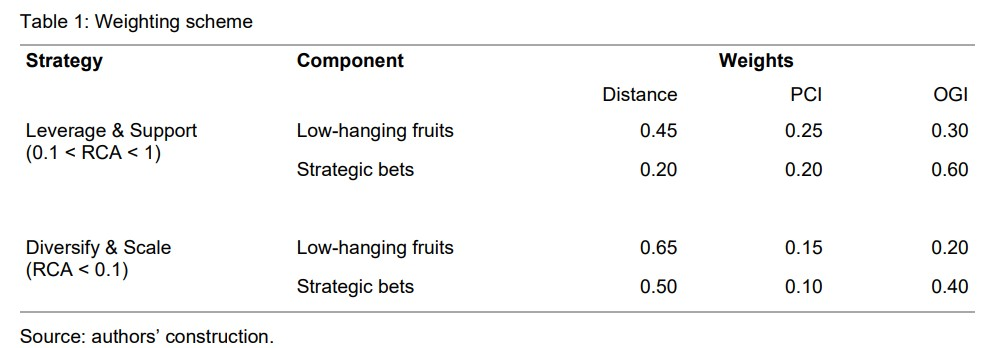

#Strategies

### Se filtra la base por año

In [ ]:
t_2018 = df_complexity[df_complexity['year']==2018].copy()
# t_levsupport_low_fruits = t_2018[(t_2018["rca"] > 0.1) & (t_2018["rca"] < 1)].copy() 
t_2018.describe()

,product_code,export_value,rca,mcp,density,year,pci,eci,coi,cog
count,160380.00,160380.00,160380.00,160380.00,160380.00,160380.00,160380.00,160380.00,160380.00,160380.00
mean,5292.52,112515931.87,1.33,0.15,0.16,2018.00,0.94,0.00,-0.00,0.36
std,2767.31,1555411303.22,22.95,0.36,0.12,0.00,1.71,1.00,1.00,0.43
min,101.00,0.00,0.00,0.00,0.00,2018.00,-4.89,-2.15,-2.74,-0.82
25%,2842.00,0.00,0.00,0.00,0.06,2018.00,-0.35,-0.80,-0.95,0.00
50%,5401.00,192437.50,0.04,0.00,0.12,2018.00,1.11,-0.09,-0.14,0.33
75%,8105.00,6594481.25,0.43,0.00,0.23,2018.00,2.29,0.75,0.79,0.70
max,9999.00,196963057664.00,4900.64,1.00,0.86,2018.00,5.63,2.30,2.81,1.49


### Normalizando Distancia, PCI y OGI

In [ ]:
def normalizar_variables(data):
  df_all = data.copy()
  df_all['distancia'] = df_all.apply(lambda x: (1-x.density),axis =1)

  dist_mean = df_all['distancia'].mean()
  density_mean = df_all['density'].mean()
  pci_mean = df_all['pci'].mean()
  ogi_mean = df_all['cog'].mean()

  dist_std = df_all['distancia'].std()
  density_std = df_all['density'].std()

  pci_std = df_all['pci'].std()
  ogi_std = df_all['cog'].std()


  df_all['dist_norm'] = df_all.apply(lambda x: (x.distancia - dist_mean)/dist_std, axis=1)
  df_all['density_norm'] = df_all.apply(lambda x: (x.density - density_mean)/density_std, axis=1)
  # df_all['density_new'] = df_all.apply(lambda x: (x.dist_norm - 1), axis=1)
  # density_new_mean = df_all['density_new'].mean()
  # density_new_std = df_all['density_new'].std()
  # df_all['density_new_norm']=df_all.apply(lambda x: (x.density_new - density_new_mean)/density_new_std, axis=1)

  # df_all['pci_norm'] = df_all.apply(lambda x: (x.pci - pci_mean)/pci_std, axis=1)
  df_all['ogi_norm'] = df_all.apply(lambda x: (x.cog - ogi_mean)/ogi_std, axis=1)



  df_all.drop(['product_name','year'],axis=1,inplace=True,errors='ignore')
  df_all = df_all.reset_index(drop=True)
  print("Calculo de variables terminado!")
  return df_all

### Filtering by country 

In [ ]:
# t_lev_sup_1_mozambique=t_levsupport_low_fruits[t_levsupport_low_fruits['country_name']=='Mozambique'].copy()
# t_lev_sup_1_mozambique.head()
# t_levsupport_low_fruits.sample(n=5)

t_mozambique = t_2018[t_2018['country_name']=='Mozambique'].copy()
eciCountry = t_mozambique['eci'].unique()
# eciMozambique=-1.26140263
eciMozambique= -1.24
eciEcuador=-0.89255489
eciCountry =eciMozambique
t_mozambique['product_code'].nunique()


1215

In [ ]:
t_mozambique.describe()

,product_code,export_value,rca,mcp,density,year,pci,eci,coi,cog
count,1215.00,1215.00,1215.00,1215.00,1215.00,1215.00,1215.00,1215.00,1215.00,1215.00
mean,5292.52,4758586.73,1.45,0.07,0.07,2018.00,0.94,-1.21,-0.95,0.51
std,2768.44,53124991.90,12.11,0.26,0.02,0.00,1.71,0.00,0.00,0.41
min,101.00,0.00,0.00,0.00,0.02,2018.00,-4.89,-1.21,-0.95,-0.38
25%,2842.50,0.00,0.00,0.00,0.05,2018.00,-0.35,-1.21,-0.95,0.15
50%,5401.00,1603.00,0.00,0.00,0.06,2018.00,1.11,-1.21,-0.95,0.53
75%,8104.50,63939.00,0.03,0.00,0.08,2018.00,2.28,-1.21,-0.95,0.84
max,9999.00,1437063424.00,280.44,1.00,0.18,2018.00,5.63,-1.21,-0.95,1.47


In [ ]:
df_mozam_h.describe()
df_mozam_h['product_code'].nunique()


,product_code,distance,density,rca2,pci,cog
count,1215.00,1215.00,1215.00,1215.00,1215.00,1215.00
mean,5292.52,0.93,0.07,1.40,0.00,0.18
std,2768.44,0.03,0.03,10.91,1.00,0.15
min,101.00,0.82,0.02,0.00,-2.95,-0.17
25%,2842.50,0.92,0.05,0.00,-0.74,0.06
50%,5401.00,0.94,0.06,0.00,0.09,0.18
75%,8104.50,0.95,0.08,0.04,0.78,0.29
max,9999.00,0.98,0.18,224.76,2.41,0.63


1215

##Leverage & support Strategy (0.1<RCA<1)

In [ ]:
# t_mozambique['distancia'] = t_mozambique.apply(lambda x: (1-x.density),axis =1).copy()
t_n_morzambique = normalizar_variables(t_mozambique).copy()
# t_n_morzambique = normalizar_variables(df_mozam_h).copy()


# t_n_morzambique.describe()
t_norm_morzambique=t_n_morzambique[(t_n_morzambique["rca"]<1)].copy() 
distanciapercentile=t_n_morzambique.distancia.quantile(q=0.75)
t_n_morzambique.describe()
t_norm_morzambique.describe()

Calculo de variables terminado!


,product_code,distance,density,rca2,pci,cog,distancia,dist_norm,density_norm,ogi_norm
count,1215.00,1215.00,1215.00,1215.00,1215.00,1215.00,1215.00,1215.00,1215.00,1215.00
mean,5292.52,0.93,0.07,1.40,0.00,0.18,0.93,0.00,0.00,0.00
std,2768.44,0.03,0.03,10.91,1.00,0.15,0.03,1.00,1.00,1.00
min,101.00,0.82,0.02,0.00,-2.95,-0.17,0.82,-4.27,-1.78,-2.33
25%,2842.50,0.92,0.05,0.00,-0.74,0.06,0.92,-0.57,-0.77,-0.78
50%,5401.00,0.94,0.06,0.00,0.09,0.18,0.94,0.25,-0.25,-0.03
75%,8104.50,0.95,0.08,0.04,0.78,0.29,0.95,0.77,0.57,0.72
max,9999.00,0.98,0.18,224.76,2.41,0.63,0.98,1.78,4.27,2.98


,product_code,distance,density,rca2,pci,cog,distancia,dist_norm,density_norm,ogi_norm
count,1124.00,1124.00,1124.00,1124.00,1124.00,1124.00,1124.00,1124.00,1124.00,1124.00
mean,5421.36,0.94,0.06,0.05,0.10,0.19,0.94,0.14,-0.14,0.06
std,2750.83,0.02,0.02,0.14,0.95,0.15,0.02,0.86,0.86,1.00
min,101.00,0.84,0.02,0.00,-2.95,-0.17,0.84,-3.77,-1.78,-2.33
25%,2917.75,0.92,0.05,0.00,-0.61,0.08,0.92,-0.39,-0.82,-0.70
50%,5601.50,0.94,0.06,0.00,0.19,0.19,0.94,0.34,-0.34,0.08
75%,8211.25,0.95,0.08,0.02,0.85,0.30,0.95,0.82,0.39,0.78
max,9999.00,0.98,0.16,1.00,2.41,0.63,0.98,1.78,3.77,2.98


In [ ]:
distanciapercentile

0.953164580227698

In [ ]:

# t_2018_levarage_support=t_2018[(t_2018["rca"] > 0.1) & (t_2018["rca"] < 1)].copy() 
# t_2018_levarage_support=t_2018_levarage_support[(t_2018_levarage_support["pci"] >= -1.26) ].copy() 

# t_2018_lev_support_mozam = t_2018_levarage_support[t_2018_levarage_support['country_name']=='Mozambique'].copy()
# t_norm_mozam = normalizar_variables(t_2018_lev_support_mozam).copy()
# t_norm_morzambique = normalizar_variables(t_mozambique).copy()
# eciCountry = t_mozambique['eci'].unique()
# t_norm_mozam_leverage_support = t_norm_morzambique[(t_norm_morzambique["rca"] > 0.1) & (t_norm_morzambique["rca"] < 1)].copy() 
t_norm_mozam_leverage_support = t_norm_morzambique[ (t_norm_morzambique["rca"] > 0.1) & (t_norm_morzambique["rca"] < 1)&(t_norm_morzambique["pci"] > eciCountry) &(t_norm_morzambique['distancia']<distanciapercentile)].copy() 


In [ ]:
distanciapercentile

0.953164580227698

In [ ]:
# t_mozambique.describe()
t_norm_mozam_leverage_support.describe()

count_zeros_mozam = (t_norm_mozam_leverage_support['cog'] == 0).sum()
print("total of 0 (zeros) in column: cog:", count_zeros_mozam)

,product_code,distance,density,rca2,pci,cog,distancia,dist_norm,density_norm,ogi_norm
count,86.00,86.00,86.00,86.00,86.00,86.00,86.00,86.00,86.00,86.00
mean,5611.77,0.93,0.07,0.34,-0.27,0.13,0.93,-0.31,0.31,-0.34
std,2807.99,0.02,0.02,0.23,0.62,0.11,0.02,0.69,0.69,0.70
min,505.00,0.88,0.05,0.10,-1.23,-0.09,0.88,-2.04,-0.76,-1.77
25%,2833.25,0.91,0.06,0.14,-0.84,0.05,0.91,-0.83,-0.34,-0.86
50%,6309.50,0.92,0.08,0.27,-0.36,0.11,0.92,-0.34,0.34,-0.45
75%,8429.75,0.94,0.09,0.44,0.17,0.21,0.94,0.34,0.83,0.20
max,9999.00,0.95,0.12,0.96,1.10,0.35,0.95,0.76,2.04,1.11


total of 0 (zeros) in column: cog: 0


In [ ]:
# t_leverage_support = t_norm[(t_norm["rca"] > 0.1) & (t_norm["rca"] < 1)].copy() 

# t_leverage_support_mozambique=t_leverage_support[t_leverage_support['country_name']=='Mozambique'].copy()
# t_norm.describe()
t_norm_mozam_leverage_support.describe()
t_norm_mozam_leverage_support.sample(n=5)

,product_code,distance,density,rca2,pci,cog,distancia,dist_norm,density_norm,ogi_norm
count,86.00,86.00,86.00,86.00,86.00,86.00,86.00,86.00,86.00,86.00
mean,5611.77,0.93,0.07,0.34,-0.27,0.13,0.93,-0.31,0.31,-0.34
std,2807.99,0.02,0.02,0.23,0.62,0.11,0.02,0.69,0.69,0.70
min,505.00,0.88,0.05,0.10,-1.23,-0.09,0.88,-2.04,-0.76,-1.77
25%,2833.25,0.91,0.06,0.14,-0.84,0.05,0.91,-0.83,-0.34,-0.86
50%,6309.50,0.92,0.08,0.27,-0.36,0.11,0.92,-0.34,0.34,-0.45
75%,8429.75,0.94,0.09,0.44,0.17,0.21,0.94,0.34,0.83,0.20
max,9999.00,0.95,0.12,0.96,1.10,0.35,0.95,0.76,2.04,1.11


,product_code,distance,density,rca2,pci,cog,distancia,dist_norm,density_norm,ogi_norm
88,1005,0.90,0.10,0.24,-1.16,0.10,0.90,-1.12,1.12,-0.55
1115,8907,0.92,0.08,0.41,0.02,0.12,0.92,-0.36,0.36,-0.42
1116,8908,0.89,0.11,0.17,-1.16,0.01,0.89,-1.53,1.53,-1.12
403,3602,0.89,0.11,0.87,-1.05,0.05,0.89,-1.54,1.54,-0.86
974,8429,0.95,0.05,0.39,0.58,0.32,0.95,0.48,-0.48,0.94


In [ ]:
def weighting_leverage_support_low_hanging_fruits(data):
  t_df = data.copy()
  print("Ponderamos...")
  print("Distancia: 0.45, PCI: 0.25, OGI: 0.30")
  t_df['weighted_distancia'] = t_df.apply(lambda x: x.dist_norm * 0.45, axis=1)
  t_df['weighted_density'] = t_df.apply(lambda x: x.density_norm * 0.45, axis=1)

  t_df['weighted_pci'] = t_df.apply(lambda x: x.pci * 0.25, axis=1)
  t_df['weighted_ogi'] = t_df.apply(lambda x: x.ogi_norm * 0.30, axis=1)
  t_df['weighted_score'] = t_df.apply(lambda x: x.weighted_density + x.weighted_pci + x.weighted_ogi, axis=1)
  # t_df['weighted_score'] = t_df.apply(lambda x: x.density*0.45 + x.pci*0.25 + x.cog*0.3, axis=1)
  print("Score del low hanging fruits en Levarage support, listo!")

  t_df=t_df[['product_code','rca','distancia','dist_norm','density','density_norm','pci','pci_norm','cog','ogi_norm','weighted_score']].sort_values(by=['weighted_score'],ascending=False).copy() ## borre pci_norm


  return t_df

def weighting_leverage_support_strategic_bets(data):
  t_df = data.copy()
  print("Ponderamos...")
  print("Distancia: 0.20, PCI: 0.20, OGI: 0.60")
  t_df['weighted_distancia'] = t_df.apply(lambda x: x.dist_norm * 0.20, axis=1)
  t_df['weighted_density'] = t_df.apply(lambda x: x.density_norm * 0.20, axis=1)

  t_df['weighted_pci'] = t_df.apply(lambda x: x.pci * 0.20, axis=1)
  t_df['weighted_ogi'] = t_df.apply(lambda x: x.ogi_norm * 0.60, axis=1)
  t_df['weighted_score'] = t_df.apply(lambda x: x.weighted_density + x.weighted_pci + x.weighted_ogi, axis=1)
  # t_df['weighted_score'] = t_df.apply(lambda x: x.density*0.45 + x.pci*0.25 + x.cog*0.3, axis=1)
  print("Score del Strategic bets en Levarage support , listo!")

  t_df=t_df[['product_code','rca','distancia','dist_norm','density','density_norm','pci','pci_norm','cog','ogi_norm','weighted_score']].sort_values(by=['weighted_score'],ascending=False).copy()


  return t_df

In [ ]:
stra1_component1 =weighting_leverage_support_low_hanging_fruits(t_norm_mozam_leverage_support).copy()
stra1_component2 = weighting_leverage_support_strategic_bets(t_norm_mozam_leverage_support).copy()

Ponderamos...
Distancia: 0.45, PCI: 0.25, OGI: 0.30
Score del low hanging fruits en Levarage support, listo!
Ponderamos...
Distancia: 0.20, PCI: 0.20, OGI: 0.60
Score del Strategic bets en Levarage support , listo!


In [ ]:
stra1_component1.describe()
stra1_component2.describe()
stra1_component1.head()
# count_zeros = (stra1_component1['cog'] == 0).sum()
# print("total of 0 (zeros) in column: cog:", count_zeros)

,product_code,rca2,distancia,dist_norm,density,density_norm,pci,cog,ogi_norm,weighted_score
count,86.00,86.00,86.00,86.00,86.00,86.00,86.00,86.00,86.00,86.00
mean,5611.77,0.34,0.93,-0.31,0.07,0.31,-0.27,0.13,-0.34,-0.03
std,2807.99,0.23,0.02,0.69,0.02,0.69,0.62,0.11,0.70,0.14
min,505.00,0.10,0.88,-2.04,0.05,-0.76,-1.23,-0.09,-1.77,-0.44
25%,2833.25,0.14,0.91,-0.83,0.06,-0.34,-0.84,0.05,-0.86,-0.11
50%,6309.50,0.27,0.92,-0.34,0.08,0.34,-0.36,0.11,-0.45,-0.01
75%,8429.75,0.44,0.94,0.34,0.09,0.83,0.17,0.21,0.20,0.05
max,9999.00,0.96,0.95,0.76,0.12,2.04,1.10,0.35,1.11,0.26


,product_code,rca2,distancia,dist_norm,density,density_norm,pci,cog,ogi_norm,weighted_score
count,86.00,86.00,86.00,86.00,86.00,86.00,86.00,86.00,86.00,86.00
mean,5611.77,0.34,0.93,-0.31,0.07,0.31,-0.27,0.13,-0.34,-0.20
std,2807.99,0.23,0.02,0.69,0.02,0.69,0.62,0.11,0.70,0.40
min,505.00,0.10,0.88,-2.04,0.05,-0.76,-1.23,-0.09,-1.77,-1.13
25%,2833.25,0.14,0.91,-0.83,0.06,-0.34,-0.84,0.05,-0.86,-0.48
50%,6309.50,0.27,0.92,-0.34,0.08,0.34,-0.36,0.11,-0.45,-0.29
75%,8429.75,0.44,0.94,0.34,0.09,0.83,0.17,0.21,0.20,0.12
max,9999.00,0.96,0.95,0.76,0.12,2.04,1.10,0.35,1.11,0.73


,product_code,rca2,distancia,dist_norm,density,density_norm,pci,cog,ogi_norm,weighted_score
1004,8459,0.12,0.95,0.75,0.05,-0.75,1.04,0.35,1.11,0.26
974,8429,0.39,0.95,0.48,0.05,-0.48,0.58,0.32,0.94,0.21
976,8431,0.26,0.94,0.31,0.06,-0.31,1.10,0.21,0.21,0.20
1211,9704,0.43,0.95,0.47,0.05,-0.47,0.33,0.34,1.02,0.18
403,3602,0.87,0.89,-1.54,0.11,1.54,-1.05,0.05,-0.86,0.17


In [ ]:
stra1_component1.head(n=4)
stra1_component2.head(n=5)

stra1_component1_n25 = stra1_component1.head(n=25)
stra1_component2_n25 = stra1_component2.head(n=25)

# stra1_component1_n25.describe()
# stra1_component1_n25.head()

,product_code,rca2,distancia,dist_norm,density,density_norm,pci,cog,ogi_norm,weighted_score
1004,8459,0.12,0.95,0.75,0.05,-0.75,1.04,0.35,1.11,0.26
974,8429,0.39,0.95,0.48,0.05,-0.48,0.58,0.32,0.94,0.21
976,8431,0.26,0.94,0.31,0.06,-0.31,1.10,0.21,0.21,0.20
1211,9704,0.43,0.95,0.47,0.05,-0.47,0.33,0.34,1.02,0.18


,product_code,rca2,distancia,dist_norm,density,density_norm,pci,cog,ogi_norm,weighted_score
1004,8459,0.12,0.95,0.75,0.05,-0.75,1.04,0.35,1.11,0.73
974,8429,0.39,0.95,0.48,0.05,-0.48,0.58,0.32,0.94,0.59
1211,9704,0.43,0.95,0.47,0.05,-0.47,0.33,0.34,1.02,0.58
901,7905,0.26,0.95,0.61,0.05,-0.61,0.44,0.34,1.02,0.58
221,2525,0.17,0.94,0.44,0.06,-0.44,0.16,0.32,0.93,0.50


### Leverage & Support Strategy: Low-Hanging fruits component

(0.8, 1.0)

(-4.0, 4.0)

Text(0.5, 0, 'Distance ')

Text(0, 0.5, 'PCI (Normalizado)')

Text(0.5, 1.0, 'Target Products in Leverage & Support Strategy [2018]')

Text(0.126, 0.96, 'Figura 17: PCI vs Distancia - Low-Hanging fruits component [2018]')

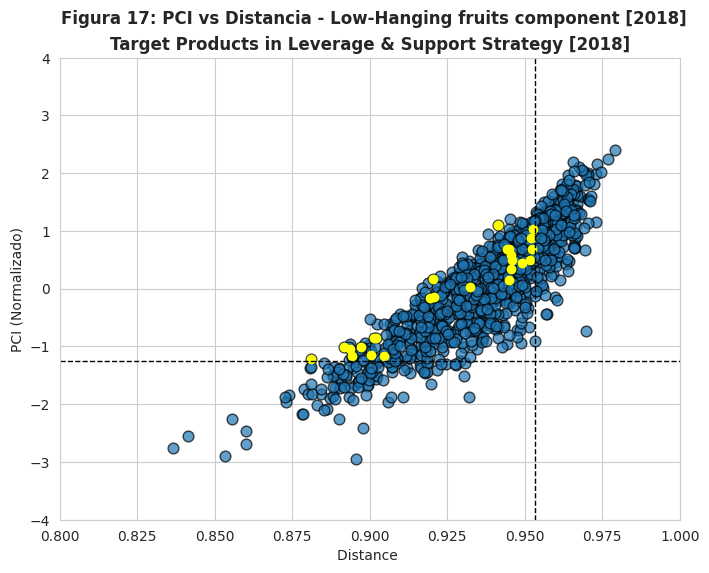

In [ ]:

# Initialize layout
fig, ax = plt.subplots(figsize = (8, 6))
# distancepercentile75th=stra1_component1.distancia.quantile(0.75)
distancepercentile75th=distanciapercentile

pci_lev_support = stra1_component1_n25['pci_norm']
# pci_lev_support = stra1_component1_n25['pci']


distancia_lev_support=stra1_component1_n25['distancia']
pci=t_norm_morzambique['pci_norm'].copy()
distancia = t_norm_morzambique['distancia']

# coi18 =  stra1_component1['coi_2018']
# residuals2018 =  stra1_component1['residuals']
# countries2018 = stra1_component1['country_name']

ax.set_xlim(0.8,1)
ax.set_ylim(-4, 4)

# ax2.set_xlim(0.865,1)

ax.scatter(distancia, pci, s=60, alpha=0.7, edgecolors="k",cmap='silver')
# ax2.plot(xvalues,eci2014, color='red',linestyle='dashed')

ax.hlines(y=-1.26, xmin=0.8, xmax=1, linewidth=1, color='black', linestyles="dashed")
ax.vlines(ymin=-4,ymax=4, x=distancepercentile75th, linewidth=1, color='black', linestyles="dashed")


# plt.plot(,df_final_moz['eci'], '"r-"')


ax.set_xlabel('Distance ')
ax.set_ylabel('PCI (Normalizado)')

plt.title("Target Products in Leverage & Support Strategy [2018]",fontsize=12,fontweight="bold")

plt.suptitle(
    "Figura 17: PCI vs Distancia - Low-Hanging fruits component [2018]",
    fontsize=12,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",  wrap=True,
)

# color = [str(item/255.) for item in pci2018]
# y = np.random.random(89)

#Se añade el label y el color sólo a Ecuador. 

for (pciz, distancez) in zip(pci_lev_support,distancia_lev_support):
        if (pciz >= eciCountry and distancez <= distancepercentile75th):
          plt.scatter(distancez,pciz, color='yellow')
        # if (countz=='Mozambique' or countz=='Ecuador'):
        #   plt.scatter(resiz,coiz,color='red')
        #   plt.text(resiz,coiz, countz, va='bottom', ha='right')
        # if (coiz >= 0 and resiz > 0):
        #   plt.scatter(resiz,coiz, edgecolors='white', color='silver')
        # if (eciz>=1.223):
        #   plt.scatter(resiz,coiz,color='green')
          # plt.text(resiz,coiz, countz, va='bottom', ha='right')  
  


plt.show()


(0.8, 1.0)

(-4.0, 4.0)

Text(0.5, 0, 'Distance ')

Text(0, 0.5, 'OGI (Normalizado)')

Text(0.5, 1.0, 'Target Products in Leverage & Support Strategy [2018]')

Text(0.126, 0.96, 'Figura 18: OGI vs. Distancia -  Low-Hanging fruits component [2018]')

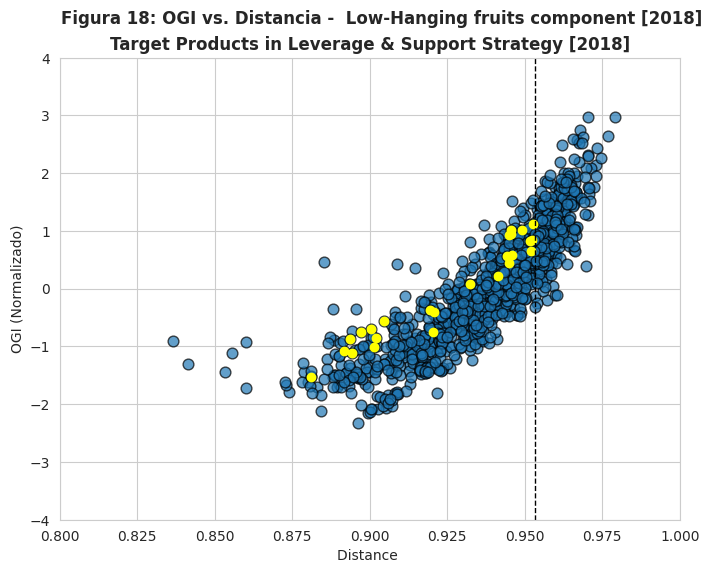

In [ ]:
# Initialize layout
fig, ax = plt.subplots(figsize = (8, 6))
# distancepercentile75th=stra1_component1.distancia.quantile(0.9)
distancepercentile75th=distanciapercentile
ogi_lev_support = stra1_component1_n25['ogi_norm']
distancia_lev_support=stra1_component1_n25['distancia']
ogi=t_norm_morzambique['ogi_norm'].copy()
distancia = t_norm_morzambique['distancia']

# coi18 =  stra1_component1['coi_2018']
# residuals2018 =  stra1_component1['residuals']
# countries2018 = stra1_component1['country_name']

ax.set_xlim(0.8,1)
ax.set_ylim(-4, 4)

# ax2.set_xlim(0.865,1)

ax.scatter(distancia, ogi, s=60, alpha=0.7, edgecolors="k",cmap='silver')
# ax2.plot(xvalues,eci2014, color='red',linestyle='dashed')

# ax.hlines(y=-1.26, xmin=0.8, xmax=1, linewidth=1, color='r')
ax.vlines(ymin=-4,ymax=4, x=distancepercentile75th, linewidth=1, color='black', linestyles="dashed")


# plt.plot(,df_final_moz['eci'], '"r-"')


ax.set_xlabel('Distance ')
ax.set_ylabel('OGI (Normalizado)')

plt.title("Target Products in Leverage & Support Strategy [2018]",fontsize=12,fontweight="bold")

plt.suptitle(
    "Figura 18: OGI vs. Distancia -  Low-Hanging fruits component [2018]",
    fontsize=12,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",  wrap=True,
)

# color = [str(item/255.) for item in pci2018]
# y = np.random.random(89)

#Se añade el label y el color sólo a Ecuador. 

for (ogiz, distancez) in zip(ogi_lev_support,distancia_lev_support):
        if (distancez <= distancepercentile75th):
          plt.scatter(distancez,ogiz, color='yellow')
        # if (countz=='Mozambique' or countz=='Ecuador'):
        #   plt.scatter(resiz,coiz,color='red')
        #   plt.text(resiz,coiz, countz, va='bottom', ha='right')
        # if (coiz >= 0 and resiz > 0):
        #   plt.scatter(resiz,coiz, edgecolors='white', color='silver')
        # if (eciz>=1.223):
        #   plt.scatter(resiz,coiz,color='green')
          # plt.text(resiz,coiz, countz, va='bottom', ha='right')  
  


plt.show()


In [ ]:
distancepercentile75th

0.953164580227698

### Leverage & Support Strategy: Strategic Bets

(0.8, 1.0)

(-4.0, 4.0)

Text(0.5, 0, 'Distance ')

Text(0, 0.5, 'PCI')

Text(0.5, 1.0, 'Target Products in Leverage & Support Strategy [2018]')

Text(0.126, 0.96, 'Figura 18: PCI vs Distancia - Strategic Bets component [2018]')

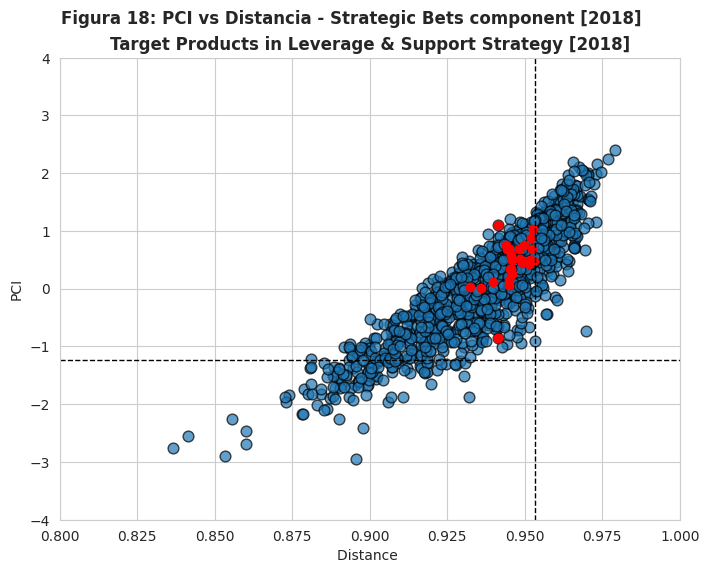

In [ ]:
# Initialize layout
fig, ax = plt.subplots(figsize = (8, 6))
# distancepercentile90th=stra1_component2.distancia.quantile(0.9)
distancepercentile75th=distanciapercentile
pci_strategic_bets = stra1_component2_n25['pci']
distancia_strategic_bets=stra1_component2_n25['distancia']
pci=t_norm_morzambique['pci'].copy()
distancia = t_norm_morzambique['distancia']

# coi18 =  stra1_component1['coi_2018']
# residuals2018 =  stra1_component1['residuals']
# countries2018 = stra1_component1['country_name']

ax.set_xlim(0.8,1)
ax.set_ylim(-4, 4)

# ax2.set_xlim(0.865,1)

ax.scatter(distancia, pci, s=60, alpha=0.7, edgecolors="k",cmap='silver')
# ax2.plot(xvalues,eci2014, color='red',linestyle='dashed')

ax.hlines(y=eciCountry, xmin=0.8, xmax=1, linewidth=1, color='black', linestyles="dashed")
ax.vlines(ymin=-4,ymax=4, x=distancepercentile75th, linewidth=1, color='black', linestyles="dashed")


# plt.plot(,df_final_moz['eci'], '"r-"')


ax.set_xlabel('Distance ')
ax.set_ylabel('PCI')

plt.title("Target Products in Leverage & Support Strategy [2018]",fontsize=12,fontweight="bold")

plt.suptitle(
    "Figura 18: PCI vs Distancia - Strategic Bets component [2018]",
    fontsize=12,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",  wrap=True,
)

# color = [str(item/255.) for item in pci2018]
# y = np.random.random(89)

#Se añade el label y el color sólo a Ecuador. 

for (pciz, distancez) in zip(pci_strategic_bets,distancia_strategic_bets):
        if (pciz >= eciCountry and distancez <= distancepercentile75th):
          plt.scatter(distancez,pciz, color='red')
        # if (countz=='Mozambique' or countz=='Ecuador'):
        #   plt.scatter(resiz,coiz,color='red')
        #   plt.text(resiz,coiz, countz, va='bottom', ha='right')
        # if (coiz >= 0 and resiz > 0):
        #   plt.scatter(resiz,coiz, edgecolors='white', color='silver')
        # if (eciz>=1.223):
        #   plt.scatter(resiz,coiz,color='green')
          # plt.text(resiz,coiz, countz, va='bottom', ha='right')  
  


plt.show()

(0.8, 1.0)

(-4.0, 4.0)

Text(0.5, 0, 'Distance ')

Text(0, 0.5, 'OGI')

Text(0.5, 1.0, 'Target Products in Leverage & Support Strategy [2018]')

Text(0.126, 0.96, 'Figura 18: OGI vs. Distancia -  Strategic Bets component [2018]')

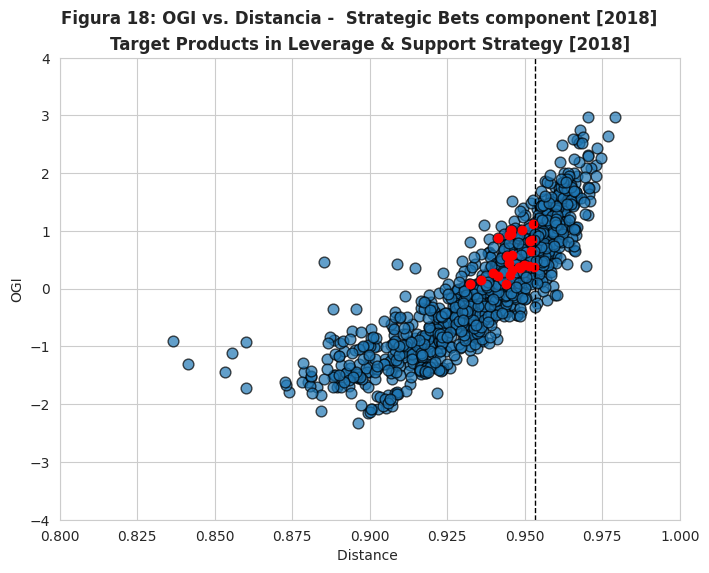

In [ ]:
# Initialize layout
fig, ax = plt.subplots(figsize = (8, 6))
# distancepercentile75th=stra1_component2.distancia.quantile(0.9)
distancepercentile75th=distanciapercentile
ogi_strategic_bets = stra1_component2_n25['ogi_norm']
distancia_strategic_bets=stra1_component2_n25['distancia']
ogi=t_norm_morzambique['ogi_norm'].copy()
distancia = t_norm_morzambique['distancia']

# coi18 =  stra1_component1['coi_2018']
# residuals2018 =  stra1_component1['residuals']
# countries2018 = stra1_component1['country_name']

ax.set_xlim(0.8,1)
ax.set_ylim(-4, 4)

# ax2.set_xlim(0.865,1)

ax.scatter(distancia, ogi, s=60, alpha=0.7, edgecolors="k",cmap='silver')
# ax2.plot(xvalues,eci2014, color='red',linestyle='dashed')

# ax.hlines(y=-1.26, xmin=0.8, xmax=1, linewidth=1, color='r')
ax.vlines(ymin=-4,ymax=4, x=distancepercentile75th, linewidth=1, color='black', linestyles="dashed")


# plt.plot(,df_final_moz['eci'], '"r-"')


ax.set_xlabel('Distance ')
ax.set_ylabel('OGI')

plt.title("Target Products in Leverage & Support Strategy [2018]",fontsize=12,fontweight="bold")

plt.suptitle(
    "Figura 18: OGI vs. Distancia -  Strategic Bets component [2018]",
    fontsize=12,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",  wrap=True,
)

# color = [str(item/255.) for item in pci2018]
# y = np.random.random(89)

#Se añade el label y el color sólo a Ecuador. 

for (ogiz, distancez) in zip(ogi_strategic_bets,distancia_strategic_bets):
        if (distancez <= distancepercentile75th):
          plt.scatter(distancez,ogiz, color='red')
        # if (countz=='Mozambique' or countz=='Ecuador'):
        #   plt.scatter(resiz,coiz,color='red')
        #   plt.text(resiz,coiz, countz, va='bottom', ha='right')
        # if (coiz >= 0 and resiz > 0):
        #   plt.scatter(resiz,coiz, edgecolors='white', color='silver')
        # if (eciz>=1.223):
        #   plt.scatter(resiz,coiz,color='green')
          # plt.text(resiz,coiz, countz, va='bottom', ha='right')  
  


plt.show()

## Diversify & Scale Strategy (RCA<0.1)

In [ ]:
# t_norm_mozam_diversify_scale = t_norm_morzambique[(t_norm_morzambique["rca"] < 0.1)].copy() 
t_norm_mozam_diversify_scale = t_norm_morzambique[(t_norm_morzambique["rca2"] < 0.1)&(t_norm_morzambique["pci"] > eciCountry)&(t_norm_morzambique["distancia"] <distanciapercentile)].copy() 

In [ ]:
t_norm_mozam_diversify_scale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 0 to 1213
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_code  624 non-null    int64  
 1   distance      624 non-null    float64
 2   density       624 non-null    float64
 3   rca2          624 non-null    float64
 4   pci           624 non-null    float64
 5   cog           624 non-null    float64
 6   distancia     624 non-null    float64
 7   dist_norm     624 non-null    float64
 8   density_norm  624 non-null    float64
 9   ogi_norm      624 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 53.6 KB


In [ ]:
def weighting_diversify_scale_low_hanging_fruits(data):
  t_df = data.copy()
  print("Ponderamos...")
  print("Distancia: 0.65, PCI: 0.15, OGI: 0.20")
  t_df['weighted_distancia'] = t_df.apply(lambda x: x.dist_norm * 0.65, axis=1)
  t_df['weighted_density'] = t_df.apply(lambda x: x.density_norm * 0.65, axis=1)

  t_df['weighted_pci'] = t_df.apply(lambda x: x.pci * 0.15, axis=1)
  t_df['weighted_ogi'] = t_df.apply(lambda x: x.ogi_norm * 0.20, axis=1)
  t_df['weighted_score'] = t_df.apply(lambda x: x.weighted_density + x.weighted_pci + x.weighted_ogi, axis=1)
  # t_df['weighted_score'] = t_df.apply(lambda x: x.density*0.45 + x.pci*0.25 + x.cog*0.3, axis=1)
  print("Score del low hanging fruits en Diversify Scale, listo!")

  t_df=t_df[['product_code','rca2','distancia','dist_norm','density','density_norm','pci','cog','ogi_norm','weighted_score']].sort_values(by=['weighted_score'],ascending=False).copy()


  return t_df

def weighting_diversify_scale_strategic_bets(data):
  t_df = data.copy()
  print("Ponderamos...")
  print("Distancia: 0.50, PCI: 0.10, OGI: 0.40")
  t_df['weighted_distancia'] = t_df.apply(lambda x: x.dist_norm * 0.50, axis=1)
  t_df['weighted_density'] = t_df.apply(lambda x: x.density_norm * 0.50, axis=1)

  t_df['weighted_pci'] = t_df.apply(lambda x: x.pci * 0.10, axis=1)
  t_df['weighted_ogi'] = t_df.apply(lambda x: x.ogi_norm * 0.40, axis=1)
  t_df['weighted_score'] = t_df.apply(lambda x: x.weighted_density + x.weighted_pci + x.weighted_ogi, axis=1)
  # t_df['weighted_score'] = t_df.apply(lambda x: x.density*0.45 + x.pci*0.25 + x.cog*0.3, axis=1)
  print("Score del Strategic bets en Diversify Scale, listo!")

  t_df=t_df[['product_code','rca2','distancia','dist_norm','density','density_norm','pci','cog','ogi_norm','weighted_score']].sort_values(by=['weighted_score'],ascending=False).copy()


  return t_df

In [ ]:
stra2_component1 =weighting_diversify_scale_low_hanging_fruits(t_norm_mozam_diversify_scale).copy()
stra2_component2 = weighting_diversify_scale_strategic_bets(t_norm_mozam_diversify_scale).copy()

Ponderamos...
Distancia: 0.65, PCI: 0.15, OGI: 0.20
Score del low hanging fruits en Diversify Scale, listo!
Ponderamos...
Distancia: 0.50, PCI: 0.10, OGI: 0.40
Score del Strategic bets en Diversify Scale, listo!


In [ ]:
# stra2_component1.head(n=10)
# stra2_component2.head(n=10)
stra2_component1.info()
stra2_component1_n25 = stra2_component1.head(n=25)
stra2_component2_n25 = stra2_component2.head(n=25)
stra2_component1_n25.head()
stra2_component2_n25.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 91 to 568
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    624 non-null    int64  
 1   rca2            624 non-null    float64
 2   distancia       624 non-null    float64
 3   dist_norm       624 non-null    float64
 4   density         624 non-null    float64
 5   density_norm    624 non-null    float64
 6   pci             624 non-null    float64
 7   cog             624 non-null    float64
 8   ogi_norm        624 non-null    float64
 9   weighted_score  624 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 53.6 KB


,product_code,rca2,distancia,dist_norm,density,density_norm,pci,cog,ogi_norm,weighted_score
91,1008,0.01,0.89,-1.52,0.11,1.52,-1.19,0.07,-0.73,0.66
853,7401,0.07,0.89,-1.56,0.11,1.56,-1.02,-0.02,-1.31,0.60
195,2402,0.01,0.89,-1.54,0.11,1.54,-0.96,-0.03,-1.38,0.58
95,1104,0.02,0.90,-1.30,0.10,1.30,-0.52,0.03,-0.99,0.57
911,8105,0.00,0.91,-0.96,0.09,0.96,-0.98,0.25,0.42,0.56


,product_code,rca2,distancia,dist_norm,density,density_norm,pci,cog,ogi_norm,weighted_score
911,8105,0.00,0.91,-0.96,0.09,0.96,-0.98,0.25,0.42,0.55
870,7502,0.00,0.91,-0.73,0.09,0.73,-0.20,0.24,0.36,0.49
872,7504,0.00,0.95,0.49,0.05,-0.49,0.55,0.41,1.51,0.41
1097,8710,0.01,0.94,0.14,0.06,-0.14,0.33,0.35,1.11,0.41
91,1008,0.01,0.89,-1.52,0.11,1.52,-1.19,0.07,-0.73,0.35


### Diversify & Scale Strategy: Low-Hanging fruits component

(0.8, 1.0)

(-4.0, 4.0)

Text(0.5, 0, 'Distance ')

Text(0, 0.5, 'PCI (Normalizado)')

Text(0.5, 1.0, 'Target Products in Diversify & Scale Strategy [2018]')

Text(0.126, 0.96, 'Figura 17: PCI vs Distancia - Low-Hanging fruits component [2018]')

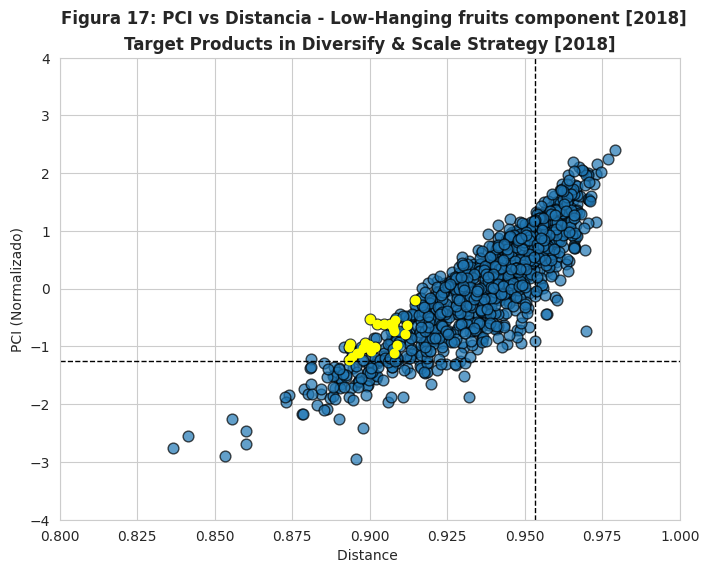

In [ ]:
# Initialize layout
fig, ax = plt.subplots(figsize = (8, 6))
# distancepercentile75th=t_norm_morzambique.distancia.quantile(0.9)

distancepercentile75th=distanciapercentile
pci_diversify_scale = stra2_component1_n25['pci']
distancia_diversify_scale=stra2_component1_n25['distancia']
pci=t_norm_morzambique['pci'].copy()
distancia = t_norm_morzambique['distancia']

# coi18 =  stra1_component1['coi_2018']
# residuals2018 =  stra1_component1['residuals']
# countries2018 = stra1_component1['country_name']

ax.set_xlim(0.8,1)
ax.set_ylim(-4, 4)

# ax2.set_xlim(0.865,1)

ax.scatter(distancia, pci, s=60, alpha=0.7, edgecolors="k",cmap='silver')
# ax2.plot(xvalues,eci2014, color='red',linestyle='dashed')

ax.hlines(y=-1.26, xmin=0.8, xmax=1, linewidth=1, color='black', linestyles="dashed")
ax.vlines(ymin=-4,ymax=4, x=distancepercentile75th, linewidth=1, color='black', linestyles="dashed")


# plt.plot(,df_final_moz['eci'], '"r-"')


ax.set_xlabel('Distance ')
ax.set_ylabel('PCI (Normalizado)')

plt.title("Target Products in Diversify & Scale Strategy [2018]",fontsize=12,fontweight="bold")

plt.suptitle(
    "Figura 17: PCI vs Distancia - Low-Hanging fruits component [2018]",
    fontsize=12,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",  wrap=True,
)

# color = [str(item/255.) for item in pci2018]
# y = np.random.random(89)

#Se añade el label y el color sólo a Ecuador. 

for (pciz, distancez) in zip(pci_diversify_scale,distancia_diversify_scale):
        if (pciz >= -1.26 and distancez <= distancepercentile75th):
          plt.scatter(distancez,pciz, color='yellow')
        # if (countz=='Mozambique' or countz=='Ecuador'):
        #   plt.scatter(resiz,coiz,color='red')
        #   plt.text(resiz,coiz, countz, va='bottom', ha='right')
        # if (coiz >= 0 and resiz > 0):
        #   plt.scatter(resiz,coiz, edgecolors='white', color='silver')
        # if (eciz>=1.223):
        #   plt.scatter(resiz,coiz,color='green')
          # plt.text(resiz,coiz, countz, va='bottom', ha='right')  
  


plt.show()

### Diversify & Scale Strategy: Strategic bets component

(0.8, 1.0)

(-4.0, 4.0)

Text(0.5, 0, 'Distance ')

Text(0, 0.5, 'PCI (Normalizado)')

Text(0.5, 1.0, 'Target Products in Diversify & Scale Strategy')

Text(0.126, 0.96, 'Figura 18: PCI vs Distancia - Strategic Bets component [2018]')

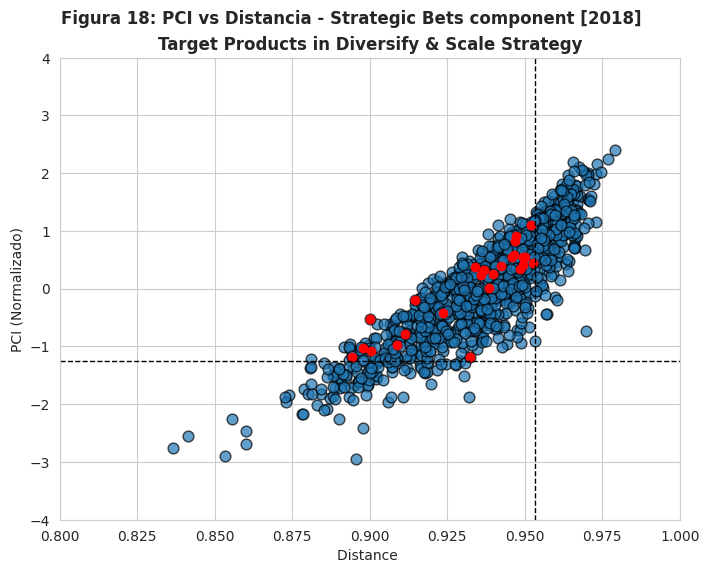

In [ ]:
# Initialize layout
fig, ax = plt.subplots(figsize = (8, 6))
# distancepercentile90th=stra2_component2.distancia.quantile(0.9)
distancepercentile75th=distanciapercentile
pci_diversify_scale_strategic_bets = stra2_component2_n25['pci']
distancia_diversify_scale_strategic_bets=stra2_component2_n25['distancia']
pci=t_norm_morzambique['pci'].copy()
distancia = t_norm_morzambique['distancia']

# coi18 =  stra1_component1['coi_2018']
# residuals2018 =  stra1_component1['residuals']
# countries2018 = stra1_component1['country_name']

ax.set_xlim(0.8,1)
ax.set_ylim(-4, 4)

# ax2.set_xlim(0.865,1)

ax.scatter(distancia, pci, s=60, alpha=0.7, edgecolors="k",cmap='silver')
# ax2.plot(xvalues,eci2014, color='red',linestyle='dashed')

ax.hlines(y=-1.26, xmin=0.8, xmax=1, linewidth=1, color='black', linestyles="dashed")
ax.vlines(ymin=-4,ymax=4, x=distancepercentile75th, linewidth=1, color='black', linestyles="dashed")


# plt.plot(,df_final_moz['eci'], '"r-"')


ax.set_xlabel('Distance ')
ax.set_ylabel('PCI (Normalizado)')

plt.title("Target Products in Diversify & Scale Strategy",fontsize=12,fontweight="bold")

plt.suptitle(
    "Figura 18: PCI vs Distancia - Strategic Bets component [2018]",
    fontsize=12,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",  wrap=True,
)

# color = [str(item/255.) for item in pci2018]
# y = np.random.random(89)

#Se añade el label y el color sólo a Ecuador. 

for (pciz, distancez) in zip(pci_diversify_scale_strategic_bets,distancia_diversify_scale_strategic_bets):
        if (pciz >= -1.26 and distancez <= distancepercentile75th):
          plt.scatter(distancez,pciz, color='red')
        # if (countz=='Mozambique' or countz=='Ecuador'):
        #   plt.scatter(resiz,coiz,color='red')
        #   plt.text(resiz,coiz, countz, va='bottom', ha='right')
        # if (coiz >= 0 and resiz > 0):
        #   plt.scatter(resiz,coiz, edgecolors='white', color='silver')
        # if (eciz>=1.223):
        #   plt.scatter(resiz,coiz,color='green')
          # plt.text(resiz,coiz, countz, va='bottom', ha='right')  
  


plt.show()

## Consolidación de productos

In [ ]:
leverage_support_products = pd.concat([stra1_component1_n25,stra1_component2_n25], ignore_index=True).copy()
diversify_scale_products= pd.concat([stra2_component1_n25,stra2_component2_n25], ignore_index=True).copy()
# leverage_support_products.head(50)
# diversify_scale_products.info()
# stra1_component1_n25.head()
# stra1_component2_n25.head()
table1 = leverage_support_products['product_code']
table2 = diversify_scale_products['product_code']
total_products= pd.concat([table1,table2], ignore_index=True).copy()
total_products.unique()
total_products.nunique()

array([8459, 8429, 8431, 9704, 3602, 7602, 2306, 2501, 8545, 7905, 2525,
       7302, 9999, 8438, 8426, 1208, 4702, 2713, 1001, 8908, 8803, 8705,
        511, 1005, 4415, 8111, 8704, 8430, 8535, 8506, 4809,  505, 5501,
       7303, 6902, 8504, 7305, 1008, 7401, 2402, 1104, 8105, 1209,  805,
       7502, 1517, 2207,  102, 2009, 1102,  304,  402, 7102,  409, 1704,
       4104, 2521, 3603, 2403, 2802, 2101,  407, 7504, 8710, 3804, 2819,
       2845, 8108, 9702, 1109, 2844, 7110, 2902, 7503, 9706, 8805, 3807,
       1002, 9023, 4701])

80

In [ ]:
# Table A1: Target products from Leverage & Support strategy, low-hanging fruits component

tableA1 = {'product_code': [ 8479,8431,8485,8412,9024,8503,2501,4415,3602,5602,8474,2523,7602,
                            7302,4404,804,8429,2306,8455,511,8535,106,8438,2713,2202 ]}
tableA2 = {'product_code': [ 8479,9024,8412,8485,8431,8455,8438,8503,5602,8535,8474,8429,8803,
                            8545,9205,8502,7302,7418,6902,9023,2826,4702,9704,7905,4809]}
tableA3 = {'product_code':[7214,2402,2009,1104,4104,1102,1209,805,102,304,1704,2403,2207,407,
                           7902,3301,409,402,4819,604,301,7313,2101,811,4707]}
tableA4 = {'product_code':[6806,1104,9033,8801,8428,8428,8433,8608,4008,8709,7307,8436,8432,5911,3921,8442,
                           4911,7211,4902,8524,7326,2402,8468,8546,102,2106]}
tabA1= pd.DataFrame.from_dict(tableA1)
tabA2= pd.DataFrame.from_dict(tableA2)
tabA3= pd.DataFrame.from_dict(tableA3)
tabA4= pd.DataFrame.from_dict(tableA4)


tableA12 = pd.concat([tabA1,tabA2], ignore_index=True).copy()
tableA34 = pd.concat([tabA3,tabA4], ignore_index=True).copy()
tabletotal_paper= pd.concat([tableA12['product_code'],tableA34['product_code']], ignore_index=True).copy()
tabletotal_paper.unique()
tabletotal_paper.nunique()
# tabletotal_paper

array([8479, 8431, 8485, 8412, 9024, 8503, 2501, 4415, 3602, 5602, 8474,
       2523, 7602, 7302, 4404,  804, 8429, 2306, 8455,  511, 8535,  106,
       8438, 2713, 2202, 8803, 8545, 9205, 8502, 7418, 6902, 9023, 2826,
       4702, 9704, 7905, 4809, 7214, 2402, 2009, 1104, 4104, 1102, 1209,
        805,  102,  304, 1704, 2403, 2207,  407, 7902, 3301,  409,  402,
       4819,  604,  301, 7313, 2101,  811, 4707, 6806, 9033, 8801, 8428,
       8433, 8608, 4008, 8709, 7307, 8436, 8432, 5911, 3921, 8442, 4911,
       7211, 4902, 8524, 7326, 8468, 8546, 2106])

84

In [ ]:
# pd.Series(list(set(tabletotal).intersection(set(total_products))))
interseccion = pd.merge(tabletotal_paper, total_products, how='inner').drop_duplicates()
interseccion.head(n=5)
interseccion.nunique()
# df = tabletotal_paper.merge(total_products, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
# df.head()

,product_code
0,8431
4,2501
5,4415
6,3602
7,7602


product_code    36
dtype: int64

In [ ]:
comparativo=t_mozambique[t_mozambique['product_code'].isin(tabletotal_paper)].copy()
comparativo=t_norm_morzambique[t_norm_morzambique['product_code']==7302].copy()
# stra1_component1_n25
comparativo.head(n=45)

,product_code,distance,density,rca2,pci,cog,distancia,dist_norm,density_norm,ogi_norm
828,7302,0.94,0.06,0.50,0.69,0.25,0.94,0.45,-0.45,0.45


In [ ]:
t_norm_morzambique.describe()

,product_code,distance,density,rca2,pci,cog,distancia,dist_norm,density_norm,ogi_norm
count,1124.00,1124.00,1124.00,1124.00,1124.00,1124.00,1124.00,1124.00,1124.00,1124.00
mean,5421.36,0.94,0.06,0.05,0.10,0.19,0.94,0.14,-0.14,0.06
std,2750.83,0.02,0.02,0.14,0.95,0.15,0.02,0.86,0.86,1.00
min,101.00,0.84,0.02,0.00,-2.95,-0.17,0.84,-3.77,-1.78,-2.33
25%,2917.75,0.92,0.05,0.00,-0.61,0.08,0.92,-0.39,-0.82,-0.70
50%,5601.50,0.94,0.06,0.00,0.19,0.19,0.94,0.34,-0.34,0.08
75%,8211.25,0.95,0.08,0.02,0.85,0.30,0.95,0.82,0.39,0.78
max,9999.00,0.98,0.16,1.00,2.41,0.63,0.98,1.78,3.77,2.98


#Robustness Checks

In [ ]:
stra1_component1_n25.head(25)

,product_code,rca,rca_norm,distancia,dist_norm,density,density_norm,pci,pci_norm,cog,ogi_norm,weighted_score
594,8485,0.14,-0.11,0.95,0.64,0.05,-0.64,2.84,1.17,1.01,1.17,0.36
315,8503,0.15,-0.11,0.94,0.39,0.06,-0.39,2.14,0.75,0.91,0.93,0.29
354,5602,0.19,-0.10,0.95,0.60,0.05,-0.60,2.15,0.76,0.98,1.10,0.25
869,6902,0.15,-0.11,0.95,0.73,0.05,-0.73,2.10,0.73,1.01,1.19,0.21
316,8504,0.19,-0.10,0.94,0.37,0.06,-0.37,1.85,0.58,0.81,0.69,0.19
855,7302,0.12,-0.11,0.95,0.43,0.05,-0.43,1.99,0.66,0.82,0.71,0.18
149,8545,0.12,-0.11,0.95,0.56,0.05,-0.56,1.99,0.66,0.88,0.86,0.17
524,7209,0.11,-0.11,0.93,-0.08,0.07,0.08,1.32,0.26,0.63,0.23,0.17
738,4415,0.13,-0.11,0.93,-0.37,0.07,0.37,1.22,0.20,0.47,-0.17,0.17
922,2839,0.27,-0.10,0.93,-0.15,0.07,0.15,1.17,0.17,0.62,0.19,0.17


## Cálculo de Ratios para cada estrategia-componente

In [ ]:
def ratio_weighting_leverage_support_low_hanging_fruits(data):
  t_df = data.copy()
  t_df['weighted_distancia'] = t_df.apply(lambda x: x.distancia * 0.45, axis=1)
  t_df['weighted_density'] = t_df.apply(lambda x: x.density_norm * 0.45, axis=1)

  t_df['weighted_pci'] = t_df.apply(lambda x: x.pci_norm * 0.25, axis=1)
  t_df['weighted_ogi'] = t_df.apply(lambda x: x.ogi_norm * 0.30, axis=1)
  t_df['Ratio_wOGI/wPCI'] = t_df.apply(lambda x: ((x.weighted_ogi)/(x.weighted_pci)), axis=1)
  # t_df['weighted_score'] = t_df.apply(lambda x: x.weighted_density + x.weighted_pci + x.weighted_ogi, axis=1)
  # t_df['weighted_score'] = t_df.apply(lambda x: x.density*0.45 + x.pci*0.25 + x.cog*0.3, axis=1)
  print("ratio de weight OGI / Weight PCI de low hanging fruits en Levarage support, listo!")

  t_df=t_df[['product_code','rca','distancia','dist_norm','density','density_norm','pci','pci_norm','cog','ogi_norm','weighted_pci','weighted_ogi','Ratio_wOGI/wPCI','weighted_distancia','weighted_score']].sort_values(by=['weighted_score'],ascending=False).copy()


  return t_df

In [ ]:
test_ratio = ratio_weighting_leverage_support_low_hanging_fruits(stra1_component1_n25).copy()

ratio de weight OGI / Weight PCI de low hanging fruits en Levarage support, listo!


In [ ]:
test_ratio.head(4)
test_ratio.describe()

,product_code,rca,distancia,dist_norm,density,density_norm,pci,pci_norm,cog,ogi_norm,weighted_pci,weighted_ogi,Ratio_wOGI/wPCI,weighted_distancia,weighted_score
580,8459,0.16,0.95,0.78,0.05,-0.78,3.10,1.33,1.20,1.65,0.33,0.50,1.50,0.43,0.48
436,7020,0.12,0.95,0.75,0.05,-0.75,2.64,1.05,1.13,1.47,0.26,0.44,1.68,0.43,0.36
594,8485,0.14,0.95,0.64,0.05,-0.64,2.84,1.17,1.01,1.17,0.29,0.35,1.20,0.43,0.36
315,8503,0.15,0.94,0.39,0.06,-0.39,2.14,0.75,0.91,0.93,0.19,0.28,1.48,0.43,0.29


,product_code,rca,distancia,dist_norm,density,density_norm,pci,pci_norm,cog,ogi_norm,weighted_pci,weighted_ogi,Ratio_wOGI/wPCI,weighted_distancia,weighted_score
count,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00
mean,7104.64,0.23,0.94,0.06,0.06,-0.06,1.51,0.37,0.71,0.42,0.09,0.13,1.77,0.42,0.19
std,1971.82,0.24,0.02,0.71,0.02,0.71,0.93,0.56,0.32,0.79,0.14,0.24,1.35,0.01,0.09
min,2710.00,0.10,0.90,-1.56,0.04,-0.84,-0.70,-0.95,0.07,-1.16,-0.24,-0.35,-0.99,0.40,0.11
25%,7020.00,0.12,0.93,-0.28,0.05,-0.60,1.13,0.15,0.54,-0.01,0.04,-0.00,1.30,0.42,0.12
50%,7310.00,0.14,0.94,0.39,0.06,-0.39,1.66,0.46,0.81,0.67,0.12,0.20,1.56,0.43,0.17
75%,8485.00,0.19,0.95,0.60,0.07,0.28,2.14,0.75,0.91,0.93,0.19,0.28,1.84,0.43,0.21
max,9999.00,0.89,0.96,0.84,0.10,1.56,3.10,1.33,1.20,1.65,0.33,0.50,6.51,0.43,0.48


<Axes: xlabel='weighted_distancia', ylabel='Ratio_wOGI/wPCI'>

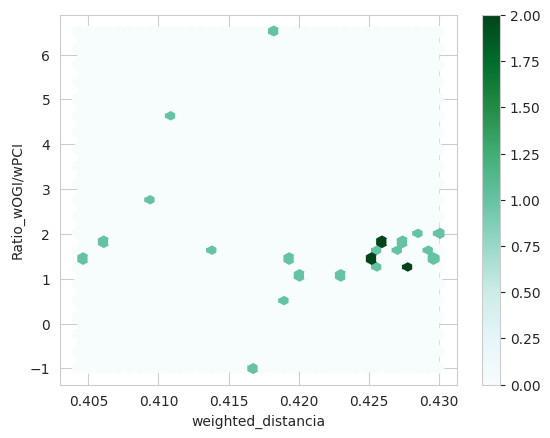

In [ ]:

# Sample data
# x = np.random.normal(size = 10000)
x=test_ratio['weighted_distancia']
y = test_ratio['Ratio_wOGI/wPCI']
test_ratio.plot.hexbin(x='weighted_distancia', y='Ratio_wOGI/wPCI', gridsize=35)


In [ ]:
# Reds

# sns.displot(test_ratio,x='weighted_distancia',y='Ratio_wOGI/wPCI')



#Librerías de Hidalgo

In [ ]:
!pip install economic-complexity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 49.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


In [ ]:
import economic_complexity as ecplx

In [ ]:
df_base_2018 = df_base[df_base['year']==2018].copy()

In [ ]:
df_pivot = pd.pivot_table(df_base_2018, index=['country_name'],
                                     columns=['product_code'],
                                     values='export_value')\
             .reset_index()\
             .set_index('country_name')\
             .dropna(axis=1, how="all")\
             .fillna(0)\
             .astype(float)

In [ ]:
df_pivot.head()

product_code,101,102,103,104,105,106,201,202,203,204,205,206,207,208,209,210,301,302,303,304,305,306,307,401,402,403,404,405,406,407,408,409,410,501,502,504,505,506,507,508,510,511,601,602,603,604,701,702,703,704,705,706,707,708,709,710,711,712,713,714,801,802,803,804,805,806,807,808,809,810,811,812,813,814,901,902,903,904,905,906,907,908,909,910,1001,1002,1003,1004,1005,1006,1007,1008,1101,1102,1103,1104,1105,1106,1107,1108,1109,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1301,1302,1401,1404,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1601,1602,1603,1604,1605,1701,1702,1703,1704,1801,1802,1803,1804,1805,1806,1901,1902,1903,1904,1905,2001,2002,2003,2004,2005,2006,2007,2008,2009,2101,2102,2103,2104,2105,2106,2201,2202,2203,2204,2205,2206,2207,2208,2209,2301,2302,2303,2304,2305,2306,2307,2308,2309,2401,2402,2403,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2528,2529,2530,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2701,2702,2703,...,8421,8422,8423,8424,8425,8426,8427,8428,8429,8430,8431,8432,8433,8434,8435,8436,8437,8438,8439,8440,8441,8442,8443,8444,8445,8446,8447,8448,8449,8450,8451,8452,8453,8454,8455,8456,8457,8458,8459,8460,8461,8462,8463,8464,8465,8466,8467,8468,8469,8470,8471,8472,8473,8474,8475,8476,8477,8478,8479,8480,8481,8482,8483,8484,8485,8501,8502,8503,8504,8505,8506,8507,8508,8509,8510,8511,8512,8513,8514,8515,8516,8517,8518,8519,8520,8521,8522,8523,8524,8525,8526,8527,8528,8529,8530,8531,8532,8533,8534,8535,8536,8537,8538,8539,8540,8541,8542,8543,8544,8545,8546,8547,8548,8601,8602,8603,8604,8605,8606,8607,8608,8609,8701,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711,8712,8713,8714,8715,8716,8801,8802,8803,8804,8805,8901,8902,8903,8904,8905,8906,8907,8908,9001,9002,9003,9004,9005,9006,9007,9008,9009,9010,9011,9012,9013,9014,9015,9016,9017,9018,9019,9020,9021,9022,9023,9024,9025,9026,9027,9028,9029,9030,9031,9032,9033,9101,9102,9103,9104,9105,9106,9107,9108,9109,9110,9111,9112,9113,9114,9201,9202,9205,9206,9207,9208,9209,9301,9302,9303,9304,9305,9306,9307,9401,9402,9403,9404,9405,9406,9502,9503,9504,9505,9506,9507,9508,9601,9602,9603,9604,9605,9606,9607,9608,9609,9610,9611,9612,9613,9614,9615,9616,9617,9618,9701,9702,9703,9704,9705,9706,9999
country_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.00,130333.00,0.00,2659886.00,0.00,713231.00,0.00,0.00,0.00,92062.00,0.00,3413.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4139.00,0.00,5569.00,38858.00,5359.00,0.00,0.00,0.00,0.00,10427.00,19082.00,720499.00,0.00,4043205.00,0.00,173128.00,0.00,0.00,0.00,16112.00,0.00,12095.00,481874.00,0.00,254972.00,28416918.00,9461113.00,215111.00,9676.00,7097.00,10843511.00,15304.00,434493.00,149812.00,0.00,314690.00,67298056.00,23522.00,43104.00,67236816.00,2621.00,62823712.00,459527.00,200201264.00,1679515.00,21835542.00,16994596.00,27987412.00,439629.00,884391.00,28342332.00,0.00,0.00,72790.00,867394.00,6794.00,0.00,0.00,0.00,0.00,15419482.00,20157944.00,3184.00,0.00,464393.00,0.00,0.00,0.00,300769.00,83926.00,0.00,6321.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2161.00,459245.00,16853.00,504204.00,0.00,13807.00,13842392.00,0.00,7262882.00,0.00,9722914.00,1980272.00,0.00,1624271.00,78261392.00,5112418.00,195094.00,227643.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,90438.00,0.00,22357.00,0.00,0.00,0.00,

### RCA, ECI, PCI, Proximity, Relatedness, Distance

In [ ]:
# rca = ecplx.rca(df_pivot)

rca_mozambique=df_pivot_rca2.loc[('Mozambique'),:]
rca_mozambique=rca_mozambique.to_frame(name="rca2").reset_index()

ECI, PCI = ecplx.complexity(df_pivot_rca2, iterations=20, drop=True)
proximityValues = ecplx.proximity(df_pivot_rca2)
relatedness = ecplx.relatedness(df_pivot_rca2,proximityValues)
distance= ecplx.distance(df_pivot_rca2, proximityValues)
distanceMozambique = distance.loc[('Mozambique'),:]
distanceMozambique=distanceMozambique.to_frame(name="distance").reset_index()

distanceMozambique['density'] =  distanceMozambique.apply(lambda x: (1-x.distance), axis=1)
# meanDensity = distanceMozambique['density'].mean()
# stdDensity = distanceMozambique['density'].std()

# distanceMozambique['density_norm'] =  distanceMozambique.apply(lambda x: (x.density - meanDensity)/stdDensity, axis=1)
df_mozambique_hidalgo = pd.DataFrame(distanceMozambique)

df_mozam_hildago_rca = pd.merge(df_mozambique_hidalgo, rca_mozambique, how='inner', on=['product_code']).drop_duplicates()

pci_2018 = PCI.to_frame(name="pci").reset_index()
eci_2018 = ECI.to_frame(name="eci").reset_index()

df_mozam_hildago_rca.describe()
df_mozam_hildago_rca.head()
# comparativoHidalgo=distanceMozambique[distanceMozambique['product_code']==7302].copy()
# ecimozambique= eci_2018.loc[('Mozambique'),:]
print(ECI)

,product_code,distance,density,rca2
count,1215.00,1215.00,1215.00,1215.00
mean,5292.52,0.93,0.07,1.40
std,2768.44,0.03,0.03,10.91
min,101.00,0.82,0.02,0.00
25%,2842.50,0.92,0.05,0.00
50%,5401.00,0.94,0.06,0.00
75%,8104.50,0.95,0.08,0.04
max,9999.00,0.98,0.18,224.76


,product_code,distance,density,rca2
0,101.00,0.94,0.06,0.00
1,102.00,0.90,0.10,0.00
2,103.00,0.94,0.06,0.00
3,104.00,0.90,0.10,0.00
4,105.00,0.93,0.07,0.02


country_name
Afghanistan                          -1.37
Albania                              -0.37
Algeria                              -1.16
Angola                               -1.21
Argentina                            -0.01
Armenia                              -0.06
Australia                            -0.41
Austria                               1.68
Azerbaijan                           -1.05
Bahrain                               0.35
Bangladesh                           -0.75
Belarus                               0.84
Belgium                               1.30
Benin                                -0.99
Bolivia                              -1.01
Bosnia and Herzegovina                0.47
Brazil                                0.19
Bulgaria                              0.54
Burkina Faso                         -1.40
Cambodia                             -0.49
Cameroon                             -1.09
Canada                                0.64
Chile                                -0.3

In [ ]:
cogHidal = ecplx.opportunity_gain(rcas=df_pivot_rca2,
                                proximities=proximityValues,
                                pci=PCI)
CogHidalMozam = cogHidal.loc[('Mozambique'),:]
cogHidalMozam = CogHidalMozam.to_frame(name="cog").reset_index()
cogHidalMozam.head()

,product_code,cog
0,101.00,0.25
1,102.00,0.03
2,103.00,0.19
3,104.00,0.02
4,105.00,0.10


In [ ]:
def opportunity_gain_index(rcas: pd.DataFrame, proximities: pd.DataFrame, pci: pd.DataFrame):
    """Calculates the opportunity gain caused by the contribution of a certain
    characteristic, relative to how this affects other characteristics.

    Args:
        rcas (pd.DataFrame) -- Matrix of RCAs considering a
        proximities (pd.DataFrame) -- [description]
        pci (pd.DataFrame) -- [description]

    Returns:
        (pd.DataFrame) --
    """
    rcas = rcas.copy()
    rcas[rcas >= 1] = 1
    rcas[rcas < 1] = 0

    # turn proximities in to ratios out of total
    prox_ratio = proximities / proximities.sum()

    # get the inverse of the RCAs matrix. Since they are in the form of 1's and
    # 0's this will flip all of them i.e. 1 = 0 and 0 = 1
    inverse_rcas = 1 - rcas

    # here we now have the middle part of the equation
    middle = inverse_rcas.multiply(pci)

    # get the relatedness with the backwards bizzaro RCAs
    dcp = ecplx.relatedness(inverse_rcas, proximities)
    # now get the inverse
    dcp = 1 - dcp
    # we now have the right-half of the equation
    right = dcp.multiply(pci)

    # matrix multiplication with proximities ratio
    ogi = middle.dot(prox_ratio)

    return ogi
ogiHidal = opportunity_gain_index(rcas=df_pivot_rca2,
                                proximities=proximityValues,
                                pci=PCI)
ogiHidalMozam = cogHidal.loc[('Mozambique'),:]
ogiHidalMozam = ogiHidalMozam.to_frame(name="cog").reset_index()
ogiHidalMozam.head()

,product_code,cog
0,101.00,0.25
1,102.00,0.03
2,103.00,0.19
3,104.00,0.02
4,105.00,0.10


In [ ]:
df_mozam_pci = pd.merge(df_mozam_hildago_rca, pci_2018, how='inner', on=['product_code']).drop_duplicates()
df_mozam_h = pd.merge(df_mozam_pci, ogiHidalMozam, how='inner', on=['product_code']).drop_duplicates()

df_mozam_h['product_code'] = df_mozam_h['product_code'].apply(np.int64)
df_mozam_h.describe()
df_mozam_h.head()

,product_code,distance,density,rca2,pci,cog
count,1215.00,1215.00,1215.00,1215.00,1215.00,1215.00
mean,5292.52,0.93,0.07,1.40,0.00,0.18
std,2768.44,0.03,0.03,10.91,1.00,0.15
min,101.00,0.82,0.02,0.00,-2.95,-0.17
25%,2842.50,0.92,0.05,0.00,-0.74,0.06
50%,5401.00,0.94,0.06,0.00,0.09,0.18
75%,8104.50,0.95,0.08,0.04,0.78,0.29
max,9999.00,0.98,0.18,224.76,2.41,0.63


,product_code,distance,density,rca2,pci,cog
0,101,0.94,0.06,0.00,-0.15,0.25
1,102,0.90,0.10,0.00,-0.61,0.03
2,103,0.94,0.06,0.00,0.60,0.19
3,104,0.90,0.10,0.00,-1.66,0.02
4,105,0.93,0.07,0.02,0.03,0.10


In [ ]:
rca_mozambique=df_pivot_rca2.loc[('Mozambique'),:]
pci_2018 = PCI.to_frame(name="pci").reset_index()
rca_mozambique=rca_mozambique.to_frame(name="rca2").reset_index()
# rca_mozambique.head()
rca_mozambique_filter = rca_mozambique[(rca_mozambique['rca2']<1)].copy()
# rca_mozambique_filter.describe()


tbtmp=rca_mozambique[rca_mozambique['product_code'].isin(tabletotal_paper)].copy()
pcitmp = pci_2018[pci_2018['product_code'].isin(tabletotal_paper)].copy()
# tbtmp.tail()
# pcitmp.tail()
pci_2018.describe()
pci_2018.head()


# interseccion2 = pd.merge(tabletotal_paper, total_products, how='inner').drop_duplicates()
# interseccion2.head(n=5)
# interseccion2.nunique()

,product_code,pci
count,1215.00,1215.00
mean,5292.52,0.00
std,2768.44,1.00
min,101.00,-2.95
25%,2842.50,-0.74
50%,5401.00,0.09
75%,8104.50,0.78
max,9999.00,2.41


,product_code,pci
0,101.00,-0.15
1,102.00,-0.61
2,103.00,0.60
3,104.00,-1.66
4,105.00,0.03


,product_code,cog
0,101.00,0.25
1,102.00,0.03
2,103.00,0.19
3,104.00,0.02
4,105.00,0.10


#### OGI Y COG MANUAL

In [ ]:
rcas = rca.copy()
rcas[rcas >= 1] = 1
rcas[rcas <1] = 0
inverse_rcas = 1 - rcas
prox_ratio = proximityValues / proximityValues.sum()
middle = inverse_rcas.multiply(PCI)
opp_gain=middle.dot(prox_ratio)
Ogi = opp_gain
OgiMozam = Ogi.loc[('Mozambique'),:]

ogi = OgiMozam.to_frame(name="ogi").reset_index()
# ogi.head()
ogi.describe()

,product_code,ogi
count,1220.00,1220.00
mean,5297.65,0.16
std,2766.50,0.20
min,101.00,-0.50
25%,2843.75,0.02
50%,5356.00,0.18
75%,8104.25,0.31
max,9999.00,0.80


In [ ]:
dcp = ecplx.relatedness(inverse_rcas,proximityValues )
    # now get the inverse
dcp = 1 - dcp
    # we now have the right-half of the equation
right = dcp.multiply(PCI)
# right.head()
cog = opp_gain + right
cog.head()

product_code,101,102,103,104,105,106,201,202,203,204,205,206,207,208,209,210,301,302,303,304,305,306,307,401,402,403,404,405,406,407,408,409,410,501,502,504,505,506,507,508,510,511,601,602,603,604,701,702,703,704,705,706,707,708,709,710,711,712,713,714,801,802,803,804,805,806,807,808,809,810,811,812,813,814,901,902,903,904,905,906,907,908,909,910,1001,1002,1003,1004,1005,1006,1007,1008,1101,1102,1103,1104,1105,1106,1107,1108,1109,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1301,1302,1401,1404,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1601,1602,1603,1604,1605,1701,1702,1703,1704,1801,1802,1803,1804,1805,1806,1901,1902,1903,1904,1905,2001,2002,2003,2004,2005,2006,2007,2008,2009,2101,2102,2103,2104,2105,2106,2201,2202,2203,2204,2205,2206,2207,2208,2209,2301,2302,2303,2304,2305,2306,2307,2308,2309,2401,2402,2403,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2528,2529,2530,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2701,2702,2703,...,8421,8422,8423,8424,8425,8426,8427,8428,8429,8430,8431,8432,8433,8434,8435,8436,8437,8438,8439,8440,8441,8442,8443,8444,8445,8446,8447,8448,8449,8450,8451,8452,8453,8454,8455,8456,8457,8458,8459,8460,8461,8462,8463,8464,8465,8466,8467,8468,8469,8470,8471,8472,8473,8474,8475,8476,8477,8478,8479,8480,8481,8482,8483,8484,8485,8501,8502,8503,8504,8505,8506,8507,8508,8509,8510,8511,8512,8513,8514,8515,8516,8517,8518,8519,8520,8521,8522,8523,8524,8525,8526,8527,8528,8529,8530,8531,8532,8533,8534,8535,8536,8537,8538,8539,8540,8541,8542,8543,8544,8545,8546,8547,8548,8601,8602,8603,8604,8605,8606,8607,8608,8609,8701,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711,8712,8713,8714,8715,8716,8801,8802,8803,8804,8805,8901,8902,8903,8904,8905,8906,8907,8908,9001,9002,9003,9004,9005,9006,9007,9008,9009,9010,9011,9012,9013,9014,9015,9016,9017,9018,9019,9020,9021,9022,9023,9024,9025,9026,9027,9028,9029,9030,9031,9032,9033,9101,9102,9103,9104,9105,9106,9107,9108,9109,9110,9111,9112,9113,9114,9201,9202,9205,9206,9207,9208,9209,9301,9302,9303,9304,9305,9306,9307,9401,9402,9403,9404,9405,9406,9502,9503,9504,9505,9506,9507,9508,9601,9602,9603,9604,9605,9606,9607,9608,9609,9610,9611,9612,9613,9614,9615,9616,9617,9618,9701,9702,9703,9704,9705,9706,9999
country_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.15,-0.02,0.24,-0.32,0.08,-0.35,-0.01,-0.15,0.35,-0.35,0.01,-0.01,0.10,0.07,0.24,0.23,-0.25,-0.35,-0.47,-0.32,-0.35,-0.57,-0.42,0.06,-0.14,0.01,0.25,0.13,0.06,-0.08,0.21,-0.25,0.06,-0.02,0.21,-0.16,0.30,0.04,-0.17,-0.16,-0.39,-0.18,0.03,-0.07,-0.25,-0.15,-0.04,-0.27,-0.45,-0.13,-0.03,-0.14,-0.16,-0.49,-0.35,-0.14,-0.21,-0.12,-0.56,-0.45,-0.56,-0.40,-0.50,-0.55,-0.30,-0.17,-0.47,-0.04,-0.30,-0.33,-0.08,-0.21,-0.17,-0.29,-0.31,-0.53,-0.62,-0.43,-0.21,-0.22,-0.34,-0.43,-0.26,-0.42,0.01,0.30,0.13,0.15,-0.08,-0.51,-0.43,-0.18,-0.37,-0.26,-0.17,-0.12,0.32,-0.43,0.13,0.03,0.39,-0.16,-0.62,-0.28,-0.09,0.16,0.05,-0.57,-0.12,-0.16,0.33,-0.53,-0.45,0.11,-0.02,-0.71,-0.19,-0.19,-0.44,0.36,0.03,0.27,-0.47,0.23,0.27,-0.18,-0.28,-0.07,0.03,-0.50,-0.18,-0.36,0.24,-0.15,-0.33,-0.23,-0.02,0.12,0.09,-0.18,0.05,0.10,0.02,0.24,-0.35,-0.41,-0.44,0.09,-0.34,-0.11,-0.56,-0.44,0.23,0.09,0.02,0.04,0.05,-0.25,-0.21,-0.07,-0.06,-0.19,-0.22,0.27,0.19,-0.17,-0.04,-0.08,-0.30,-0.28,-0.09,-0.11,-0.12,-0.01,-0.01,0.00,-0.05,-0.08,-0.03,-0.06,0.11,0.06,-0.17

In [ ]:
CogMozam = cog.loc[('Mozambique'),:]
cogMozam = CogMozam.to_frame(name="cog").reset_index()
moz2018=moz2018.sort_values(by=['product_code'])
eci = ECI.to_frame(name="ECI").reset_index()
pci = PCI.to_frame(name="PCI").reset_index()

eciMozambique=eci[eci['country_name']=='Mozambique']
cogMozam.head()
moz2018.head()
cogHidalMozam.head()
eciMozambique.head()
pci.describe()

NameError: ignored

### Se descarga el dataframe de ECI y PCI a la máquina: 


In [ ]:
# from google.colab import files
# df_ecm2.to_csv('df_ecm3.csv') 
# files.download('df_ecm3.csv')